# Mini Project: Grid Universe

**Release Date**: 14 October, 2025

**Due Date**: 23:59, 8 November, 2025

## Overview

Grid Universe is a flexible, feature‑rich, grid‑based environment. Levels can have different objectives (e.g., reach an exit, collect required items) and diverse mechanics such as portals, power‑ups, hazards, pushable blocks, keys and doors, and enemies. The primary observation is an image, and the level objective may sometimes be provided as ciphertext that you must decode. Together, these elements make the environment multifaceted and challenging, requiring search, planning, and potentially machine learning.

In agent–environment terminology, Grid Universe is fully observable, single‑agent, deterministic, sequential, static, and discrete. Your goal in this mini project is to develop an agent that solves levels featuring varied mechanics while minimizing total cost (equivalently maximizing total reward / score).

How do you code an AI to play this game? As elsewhere in the course, you implement an agent: it receives sensory input, reasons about that input, and outputs an action each time step. Your program must parse the state (with the image as the primary observation) and produce valid actions.

You may find it helpful to write a function that converts the raw state—image plus (possibly encrypted) objective—into (a) a structured internal representation and (b) an interpretable objective. With these in place, you can perform search and planning, potentially using an environment model. Because the state space can be large, it may be beneficial to design a good heuristic to guide search.

### Required Files
- `mini-project.ipynb` - main notebook file
- `grid-universe.ipynb` - Grid Universe tutorial notebook
- `data/` - Dataset folder
- `utils.py` - Utility file
- `environment.yml` - Conda environment specification

### Policy
See our [Course Policies](https://canvas.nus.edu.sg/courses/77861/pages/course-policies).

Any form of cheating—plagiarism, probing / hacking Coursemology test cases, or other dishonest conduct—will be treated as an academic offense. This mini project is worth 10% of the final grade; thus any misconduct is a **Moderate Offense** and may incur an <span style="color:red"><strong>automatic 'F' grade</strong></span>. Submission history will be closely monitored.

### Post‑Mini Project Survey
Your feedback matters. After you finish, please complete the [survey](https://coursemology.org/courses/3095/surveys/2724).

### Forum
Questions? Visit the [forum](https://coursemology.org/courses/3095/forums/mini-project).

### Environment

You will need to create a new environment (`cs2109s-ay2526s1-project`) for the mini project using the `environment.yml` that we provided along with this notebook. This is required because the mini project depends on packages which are not available in the environment that we use for the problem sets.

Please refer to the guide in PS0 to set up a new conda environment.

### Note

- While you can write and run Python directly in this notebook, we recommend using an IDE for algorithm development (better debugging). For machine learning experimentation, a Jupyter notebook is often appropriate.
- It is highly recommended to play with Grid Universe tutorial notebook. It is specifically designed to help you complete the mini project. If you skip it, it is likely that you will get lost and spend many hours trying to figure out the solution.

## Task and Submission

Your task is to develop an agent that plays Grid Universe effectively.

Implement the `Agent` class (see [AI Agent](#AI-Agent)) with your logic.

### Submission Details

#### Agent
Submit your `Agent` code to Coursemology.

- **Tasks:** To make the grand objective manageable, we provide three tasks (see [Tasks](#Tasks)), each isolates a subset of challenges, and one final task that combines everything.
  - Task 1 [12 marks]: Structured state representation; plaintext objective.
  - Task 2 [2 marks]: Structured state representation; ciphertext objective.
  - Task 3 [12 marks]: Image observation + supplemental structured data; plaintext objective.
  - Task 4 [4 marks]: Everything: multiple gameplay mechanics; image and level observation; ciphertext objective (full challenge).

- **Test Cases:** Each task includes multiple test cases. Each test case contains many level instances that may differ in mechanics, size, and complexity.

You may reuse the same agent for all tasks or adapt it per task.

#### Supplementary Files
Upload all code and files used to build your agent. If you apply machine learning, include (as applicable): dataset generation scripts, training code, and any generated datasets. These materials support plagiarism detection and confirm originality.

<b style="color:red">Note: If you use machine learning in your mini project and fail to provide the files mentioned above, you will receive zero marks for the corresponding parts of the project.</b>

### Attempt Limit
- You have **20 attempts** for each task.

### Time Limit
The time limit for each **level instance** is given below:
- Task 1, 2, 3: 25 seconds
- Task 4: 100 seconds

### Coursemology Constraints
- Maximum memory: 1.5 GB. Maximum upload size: 2 MB.
- No GPU. Assume a single CPU core; avoid multi‑threaded / multi‑process solutions.
- To gauge runtime speed and available libraries, you can use [Coursemology Tester](https://coursemology.org/courses/3095/assessments/81641).

### Grading Scheme
Your score depends on the performance of your agent on **private test cases**. We compare the total reward of the solution of your agent to the optimal total reward. For each level instance in a test case:

- If your agent times out (exceeds time limit or maximum steps) or fail to complete the objective: `performance = 0`.
- Otherwise: `performance = max(0, total reward - min total reward) / (optimal total reward - min total reward)`.

The test case performance is the average over all level instances.

The test case mark is `testcase mark = min(1, test case performance / 0.85)`. Basically, you will only need to get 85% average performance of the optimal agent to get full marks. For the capstone task, the mark for each test case is doubled (maximum marks is 2).

The maximum marks across all tasks is **30 marks**. This will be normalized to a maximum of 10 marks (10% of your final grade).

**Note:**
- If you submit multiple versions for a task, specify in the task comments which submission you wish to be graded.
- The performance of your agent in public test cases may not accurately reflect its performance in private test cases. Therefore, it is crucial to ensure that your agent can generalize well to new, unseen levels.

## Grid Universe

### Overview

Grid Universe is, at its core, a grid‑world environment enriched with varied mechanics. A level is an M×N grid (positive integers M, N). Each tile can contain multiple objects (floor, agent, portal, key, door, enemy, etc.), each with distinct behavior. The goal depends on the level’s objective: one level may require only reaching an exit; another may require collecting specified items before exiting.

Please refer to the **Grid Universe tutorial notebook** for more details.

> It is highly recommended (we would even say mandatory!) to explore the Grid Universe tutorial notebook from the beginning until the end, especially if you are lost.

**Additional resources:**

- See the [Player Guide](https://rizkiarm.github.io/grid-universe/guides/player_guide/) for a friendly introduction.

- For code and full documentation, visit the [GitHub repository](https://github.com/rizkiarm/grid-universe/) and the [API docs](https://rizkiarm.github.io/grid-universe/).

- For playing the game yourself, try the [Streamlit Demo](https://grid-universe.streamlit.app/).

### Constraints (Project Scope)
To keep the mini project tractable, we enforce the following constraints:

- Objectives are restricted to two types: `exit_objective_fn` and `default_objective_fn`.
- All object movements are deterministic and move at most one tile per step.
- The agent moves one tile per step, except under the speed (Boots) power‑up, which doubles movement to two tiles per step.
- Each entity type has a fixed, known cost, damage, or reward (cost = –reward) where applicable:
  - Coins: reward 5.
  - Cores (required items): reward 0.
  - Floor tiles: cost 3 (the action cost is the cost of the tile you stand on after the action, except the exit tile which costs 0—an action ending on the exit costs 0).
  - Hazards: damage 2.
  - Enemies: damage 1.
- Boxes and enemies can only move orthogonally and bounce. No diagonal movement or complicated AI.
- At most one key–door pair and one portal pair per level.
- Power‑up durations are fixed:
  - Boots (Speed): 5 steps.
  - Ghost (Phasing): 5 steps.
  - Shield: 5 uses.
- Agent health may vary per level.

### Objective and Challenges
Your overarching objective is to build an agent that plays well across diverse levels. Key challenges:

- **Planning:** Navigate mazes; potentially avoid enemies and hazards; open doors; use portals; sequence actions to minimize total cost / maximize total reward.
- **Image Interpretation:** The principal observation is a rendered top‑down RGBA image. You must transform it into a representation suitable for search / planning.
- **Ciphertext Objectives:** Some levels encode the objective as a fixed‑length ciphertext. Decoding it is essential; misunderstanding leads to wasted actions (e.g., collecting unnecessary cores or omitting required ones).

We decompose the overarching problem into tasks to let you focus on one challenge at a time (see [Tasks](#Tasks)).

### State Representation
The form of state depends on the task. Tasks 1 and 2 expose a structured `Level` object. Task 3 and 4 provides an RGB image plus supplementary structured information.

#### Level Object
An instance of class `Level` with attributes:

- `width: int` – grid width.
- `height: int` – grid height.
- `move_fn: function` – movement rules.
- `objective_fn: function` – objective function (redacted and replaced by a dummy in Task 2 and 4).
- `grid: List[List[EntitySpec]]` – height×width matrix; each cell is a list of `EntitySpec`.
- `score: int` – current score.
- `message: str` – ciphertext (if objective redacted) to decode.
- `win: bool`, `lose: bool` – termination flags.
- `turn: int` – current turn count.
- `turn_limit: int` – maximum turns (if any).
- `seed: int` – random seed.

`EntitySpec` describes an entity in a cell:
- Properties (components), e.g., `agent`, `blocking`, etc.
- `inventory: list` – carried items.
- `status: list` – active status effects / power‑ups.

See the Grid Universe tutorial notebook for a gentle start.

**API references:**
- [Level](https://rizkiarm.github.io/grid-universe/reference/api/#levels-authoring)
- [Components](https://rizkiarm.github.io/grid-universe/reference/api/#components)

#### Image + Extra Information

The observation is an `Observation` dictionary defined in `grid_universe.gym_env` with the following fields:

- `image`: Top‑down RGBA rendering of the current level state (shape H × W × 4, dtype `uint8`). Each (logical) grid cell is visualized; when multiple entities share a tile, their sprites are composited according to appearance priority rules.
- `info`:
  - `agent`:
    - `health`:
      - `health: int` – Current hit points after the last resolved action (cannot exceed `max_health`).
      - `max_health: int` – Maximum possible hit points for this level configuration.
    - `effects: List[EffectEntry]` – Active temporary effects / power‑ups (e.g., speed, phasing, shield), each usually carrying remaining duration or uses.
    - `inventory: List[InventoryItem]` – Items the agent currently holds (e.g., key).
  - `status`:
    - `score: int` – Accumulated reward so far (sum of rewards minus costs).
    - `phase: str` – Game state: `"ongoing"`, `"win"`, or `"lose"`.
    - `turn: int` – Number of turns elapsed.
  - `config`:
    - `move_fn: str` – Identifier/name of the movement rule used to update entities each step.
    - `objective_fn: str` – Identifier/name of the objective function; This will be redacted in Task 2 and 4.
    - `seed: int` – Random seed used for procedural aspects (−1 if no seed / non‑deterministic origin provided).
    - `width: int` – Level width in tiles.
    - `height: int` – Level height in tiles.
    - `turn_limit: int` – Maximum allowed turns before forced termination (−1 signifies no limit).
  - `message: str` – ciphertext (if objective redacted) to decode.

Multiple objects can occupy the same tile. Rendering layers them by [priority rules](https://rizkiarm.github.io/grid-universe/guides/authoring_levels/#appearance-priority-and-layering)

For an example observation, see the [Grid Universe demo](http://grid-universe.streamlit.app).

### Actions

Actions use the `Action` enum defined in `grid_universe.gym_env`:

- Movement: `UP`, `DOWN`, `LEFT`, `RIGHT`
- `USE_KEY`: use a key in inventory (if any)
- `PICK_UP`: collect all objects in the cell with the `Collectible` component
- `WAIT`: no operation

> Note that the `Action` enum here is distinct from the (same-named) `Action` enum defined in `grid_universe.actions`, which is utilized by the engine.

For more details regarding `Observation` and `Action`, check out the [docs](https://rizkiarm.github.io/grid-universe/guides/gym_env/#observation-and-action-spaces).

## AI Agent

Design and implement an agent that can generalize across the three tasks and varied level mechanics. This section defines the required interface, potential approach, and evaluation expectations.

### Interface Contract
Your submission must expose an `Agent` class with:
- `__init__(self)`: Initialization (e.g. model loading) is allowed but must fit within memory/time limits.
- `step(self, state: Level | Observation) -> Action`: Called once per environment step. Must return a valid `Action` enum member.

Input types:
- `Level` (rich object API) for task 1 and 2.
- `Observation` (TypedDict) for task 3 and 4.

Write code that gracefully handles either by checking the state's type, i.e., `isinstance(state, Level)`.

### Potential Approach

1. **Perception / Parsing**: Convert Level or Observation into a structured state representation.
2. **Objective Interpretation**: If the objective is ciphertext (Task 2 and Task 4), decode it. Produce a normalized goal specification.
3. **Planning / Policy**: Use search algorithms such as BFS, UCS, and A* or a learned policy to produce an action sequence. Hint: keep in mind that the problem is fully observable and deterministic.

Note: this is just one potential approach, you are free to explore and use any approach.

### Implementation

Below is a starter `Agent` class. Replace its internals with your architecture.


In [7]:
# Asset root for rendering. You can change this if you want to use custom game assets.
ASSET_ROOT = "data/assets/"

# Unified imports for Grid Universe tutorial (run this cell first)
from typing import List, Tuple

# Core API
from grid_universe.levels.grid import Level
from grid_universe.state import State
from grid_universe.levels.convert import to_state, from_state
from grid_universe.actions import Action
from grid_universe.step import step

# Factories
from grid_universe.levels.factories import (
    create_floor,
    create_agent,
    create_box,
    create_coin,
    create_exit,
    create_wall,
    create_key,
    create_door,
    create_portal,
    create_core,
    create_hazard,
    create_monster,
    create_phasing_effect,
    create_speed_effect,
    create_immunity_effect,
)

# Movement and objectives
from grid_universe.moves import default_move_fn
from grid_universe.objectives import (
    exit_objective_fn,
    default_objective_fn,
    all_pushable_at_exit_objective_fn,
    all_unlocked_objective_fn,
)

# Components and enums
from grid_universe.components.properties import Moving
from grid_universe.components.properties.moving import MovingAxis
from grid_universe.components.properties.appearance import AppearanceName
from grid_universe.components.properties.pathfinding import PathfindingType

# Rendering and display
from grid_universe.renderer.texture import TextureRenderer
from IPython.display import display
from grid_universe.levels.factories import create_wall

# Default renderer used throughout the notebook unless overridden in a cell
renderer = TextureRenderer(resolution=240, asset_root=ASSET_ROOT)
renderer_large = TextureRenderer(resolution=480, asset_root=ASSET_ROOT)

In [8]:
# Unified imports for Grid Universe tutorial (run this cell first)
import random
import time
from typing import List
from queue import PriorityQueue
from grid_universe.state import State
from grid_universe.actions import Action
from grid_universe.levels.grid import Level

from grid_universe.step import EntityID, step
from grid_universe.levels.convert import to_state, from_state

from grid_universe.components.properties import Position, inventory
from grid_universe.levels.convert import _entity_object_from_state
from grid_universe.utils.ecs import entities_with_components_at

# Core API
from grid_universe.gym_env import Observation

import torch
from torch import Tensor, nn

CIPHER_TEXT_MODEL_PATH = "ciphertext-model"


def get_cipher_model(device: str = "cpu", dtype: str | None = None):
    """
    Return a TorchScript model loaded from an embedded, base64-encoded compressed blob.
    Self-contained: no need for the original Python class.

    Args:
        device: Where to map the model (e.g., "cpu", "cuda", "cuda:0").
        dtype: Optional dtype to convert parameters/buffers to (e.g., "float32", "float16").
    """
    import base64, io, torch
    import zlib as _z

    _decomp = _z.decompress
    _blob_b64 = "eNpkmXc8V2/Yx8kosygVaZKMqMz43leS7BEphSJERIqsUMjee8vee6/vfVlllpbRoP1rl6Z2ejz/Ps/953m9zn3Oed3X9bne79cxMWBjZ2FZsoTl/y1+lhUsth72Ts7eDtuO23rabtuuvWcZi+X/WVaXu/Grlydli9yMQY63yKI7l9BJcB+O2ufjs85aPNj/jc4J5KOadja4s/YSwa4emFTwxNO9NlCqWETvZK4HpxN/CfNnCNSf6wCvqFW0mLOVdn9bgvltaqhs6wDla3mox9owlBi0hmPP3hO1tlK8WtUMPWZTtFVCAusvv6X9Kp/IVzcOMH+8k6xvXAvhQU10WcMltPMuwA2dPnSYiKHzzA666EgQfWWfAulzVcR5STDJ8GtDp6xmuJtchapYAH3Jl+malZ10k8hyUmDmAYEbCuhswWUm+3A01gddhV0ZaRh5zpaRcL0ZJ/3k4aojD+U6XouNcoJ0fQUH2ePXhI9ntFFcSwuMphPJC7lW1aGyPCyVWAfacqcoR2cnc8BXFgKYk1Dp0AKD+4NBzzUV+Ad+dDW596uyar3H/XHS5JllASxSf0B6DnShwYAQkXuH9DpfH2g7BcHKa6Jwb0qJCtf0wY/JM2DB3wC6JstIYUkuvoiOgfH0RdiyTQY/rET8deU2SO17yjwzEwM8FsNUOmUYLGfmqThnLRZLh1Lrdi/YsZEBOq+7wfhCPvhavCTPNCPxYrwrhEzzwtDKNozoNoPAa/+RI7mBYLtsefeOiUiwP3eP6fv0DNoYt6L9RSXUZDfB+YpSNOj7jOLrXejg7bu06kcjqq1gg/yEMjjkzAaly36R+UIz2L8nGdoPhRGTof2MwBpxeheeUZd7/QhBGiQm/TzKxafg+4XvNbpZA98STZmKW1jIBs4R4LFvo19HKNXaX4i1Kl/JrTxDPLPGC0LEDmJiswOuF5sEscNREFF4kPlhlIk/Wztp0KZ+5PmjS1kupoHhqSgsY2rh12MJtH3/EswaiwHMsEXjqiewh1cUerVrqVihC66yDIYTv18QzZND6HmiFuoGjZmR9g/wy6Eg0Fg4r/Tm2/DyZDQK7uonu8JSYOn7IcjISwdWdqTt5ofwsSyl7HohaC1RSUICl8B7lTZo2a4Id/3HmAWOxVje6EYN66qJf2kwDX5eApJd5XjuXQkM3TfCt+ZiuPOnKNl4dQOGGRTi2Lli2FW3GE971mHHor3Y+VYV/qSEYNqpHmBpMcHYZfLYnRWI261vwccnu+DEtQHMjRNCa2d7ylvgDaGP4ojj/hZcf6IXerwOUp69HWhtpQaTxwwoFSug+0N20C/Z3rSbJxK/KRSD/V6K+3XmKRNfU8/s3M4K4Rxqsi6HSvGzgbSeDTSs5KErPvXh/cWxoL3qEsYs8wN90Wj4+LiO1q+4jIPawqgoLIJcOnXgFKeD8fohKJ0XCTzqw/hRIAwDp1VJ2B0j3OhaD1aJPvBRW5jx3u8P0bVaD3GHUyGQLYiSGQFUbnxGeFnK0FLADltO7IL1N9UhSz0GCnjvwqfWO0xPjQ6YMxnAMfWdMHluNXCNvKL39gfAMdVK0LzJhKdNl8F1bSF5cn8Z3BY+jCZve2hpbDoOWfykfm5SsDz7GVHU74SZlxoYoVyO8bF5OBQRD4t0JSFIPwLVJHvx6fvlVKFZkcasLiHjzyvxV9VaXPrUHlY9CWbEHeiGZRprGWaeB9DuaAEY/+zv6qjuoq9v9qDAYDBEzCvQgFWm8DrADyQnQuGWiT56CpeTGNVSFN1bASedtqGfxgyNMR8jD/KiYdPjEzjFIoNXrytjxp1nnT9+lqNYswieNNCC9zVeyLdtDLzFK+jxLTfB8082Y6z0Ha0R8YEa8xyISS9AHf1sRp5pImm2ekudzkXiicg4eH2mHZyOsMCEvxDV3JKFNWIZhCQlg6ZHJ3Rc9EXZH8+oQ9xrhkNFMiy9kIL0yiZ48CsEN3fn4UGrRip/VgDj1/+mjRERaMJ+nI6laQL3i32oEKWKFuuCkG1POjzY4onFNy/AMaMmiOwWB66J08BiW4qrq5PxiM0BDF9lA7El6aR8YwoYLj4Ltg1H8ZgtFy6RboZFnM8ZG759JepybdgvOIrcfCM4nZQLb9ZzgcKiCuDirIQXrTIw+C0O/lX2Uw2V9TRhczWk3wvCyA9c4OF3im7+XghiOmNU8OdbeoCtEKcFEqFdMh2lamsgYP4+I0XGFtTqm9BbNxnPZxyHjXQTzLNeZ24uuEXXlm+n29/fIva6W/Cw1DEIqgbI+S+WHhhKJ+6vUmBPtwZYHipHI3lg8s4+Ykgn8FMgBxgNXkJwbHcUhtwcIou4zuBJ6RL4wjtLLn+rhK8v6kh2Cg88c76B2nbPqKvyKqy028w0LbqFV1e5YmNHNobuN4Oyl+GMbU96kPOaIIy36yDjThLqaZVCmkI3/B1Phfpue9hpbg27399EK1ZVWlXYwxhckkV7+1wg1+ws2q7KpCW3DuOdD0w8+N0L/5P3Aw3zTpwv66GZ1Vzg9zoOJJdW4J46QxQ4NUtjkxIg+FA3XNrHxLwDsainakHzeitIwD4f2C4kBF9TisjRzVfg1ZUcGHdLwB/Pg9ArrArmOkbh8i416Jrloe9vdcDl51K4zNwCxeUaIbEiEs+c/UXbpDoY1c/PwGrvDOJ9jgOvN38nJzWQtDiyQ/D5jTi3ow316kLQYkMeqss5AUu7CPZEeJDosUywiH/K/PyOh+opjdNQgdtkwtEPh4d8qOTtGvRPj8ZiTxVYE3GXBsx7oJiJDJ611Iait2bIf9EYL0lU4w+FMVhmVwx3xW7Qq7/jGCFFxvCtZwX6pcmCuG4ObJXeSHLuNKL7RmF0j2oFNcU02Gbdjs5l5yE1+Q1J91yPR/vimFdc71Jebzd08syGP77PIWN2CS47OcbM7lsMSr2ChEOoHqSCa5DlEBulaY34mE2SxIY+hzjfCuRqLoGUyRZM746noOuMvPHpWMKyn5YGpeIK/1z4qZGKBgbhUKaWhcGJQvDXlIcs3pkBS8+kwx+zMHovPAv+DD1iBIUP4Eu5QtB9bA3LWOrprzffaKeBFq4SLYRoSVm0+deBKmzWmO16DqlLOwVLFeq5Kh1e7EwAwcAQZA0uhrcO50FxTR7ke5RDpwwX1eO/jkMhF3D8TxzhTBeFsZX1cLJ7A3kizAnJZxhQc7gJHix+g3keFO28GjGovIjwRXrSjdvyaVRcJZwIEoKlBqOEns5C30dHsGxRBipGxuCjpV5U7E85nHkkTx2PvGU89gtmckczmGVCjvDR3wwf6r4ipgLV5LZpO3Mq2AZk2YLQW7wITp5PpN/SNgBYF+Ll/jDAJXbw+S038PFcwtNcHcgRkY3r/3SBeoIw+FcKkVC3JTTXjxtO0Dqcij+O3TLTzDMKFcjKXQ0tH8rBVOwkrdkJsCLzIbWJGqduK4fwXjEbvGtzhZqfRsBn/B4+1KxGH9vLcE7vKQhPvEVro1eMIs1LpECznxwfM4Xf1q7klqount23DE5vcYHJJD1waHyGpXsuoharCb5sicQfUmuJl2wBblvjCMcbVUCcTxQrEl4yc0LMGaUHc3FP8kW4e0x7oe7KIbaqC7auvIcmTkPEqtQOMyUX4X0BU0hbrYF3ZCVxbHEV0WkOh9yd2arVtplU+9lNRqD4MmSKOqLqNh0Y3xCMsSp3oHWmmbRsaMeiZ3wokTJGz8VHgea3Q9BV3UoOuNTAuWF/oscSB7++e8KxG6EYO2mo+kZsG/FVu0PVs3lgm2IezK7Uob7giN1S7KjRVQbDKgXI8eUAw1L6AI4G7Aa+IV8caouGI7xdcDXgFOGV0oZUyyTICG+iuv/4KBqnkmGpo3j0u0vn754EILWj2GmzE5Q6wtHhfDc+OTeESY3vqOehcOiuakdJqQrgTiggK/pXErHvzvibUwhZt/aRrd+jMSa1G6JbJjDlURTuy9+O7e9LoGrNNfKopQxT3AIR22zwyb06lO+LJb8DpbGC1IHjpB4zV3U9RPewkxszNbDPUxf8dzaR1p4p5ONJgFmlXPp0Mha4AsOgYUs8HC3ux50uY7htIgIFz9zskvdp71I+egD6La9jZXw8zLALUvZviIYvkpG97BDudmxihqznoZoiCbQpaTV1qMsAq3ff6dDj6ygUfJd8TFVnsrKkwpL93qA5Jwzav7IwIkyA1BxRh4yl6XCeZMDuLaJwzi4BU73fkgpZd3zP+oEoS2eQjN4gqsQqQg4dNAGRX1X0glw8ES50RJ2xYvi8IhsMBoK7liXnwdtnxjBgZo0dT86Dq78+o3f1U9LzeA/UpJTirXdpoPO2AyUPrYPOxqeMAQgHu9fPsbZbnrou1ONHsVxgf80FVt9VQCc+BlTPiGH5DxF065bFN5w2YFXdSKycOPBXfxrpFnrO2LZKAy5e0MFqzdVY2PsI1xUkUJ8trDT8oge8UTBH1sXvu2wqm/E/lQwa3srNMA9OBLkv3ODmVo63rIuQQ/wu2ZYbhUV8kVRsQAJ2py64xHJhOPyqoYv9cRfodWks0Hw/Zc5Uw7L9Yqi7pwkcjobB1sce4Hs9G7a7rILP714z3NdFY006D73LnYYuW1xx77MeuvLrDP3XWYIzn6OQi1USbxeX0OFN3bCiLQq2EC5ML7tG+lXHga02jK7OqIV6ViYWHphmOvguJ4ei1XBdPRC2kRfEt8kGDEdKwfEDO+ybWgqvNN5RjiWbcD8jFKvUYyE/7TywjLpA8dccrB1WpzvWBcL0w3Z6Lm0byKjXQuYyRKn8XvrLuJs+2lmAm5esRZP/lkLX+VB6b7oZElNj6IikJ1qyraJfdPeCsNJaZDt2HAY0/pF7Wpvo/ctluIuvl+ofigf6MQKTE1hxvHUEjQS4oMpzKUjIikHDXBEsj76Ev45VgYuhLVgvTsAMo0vE7Yw2aVx+BOI9AqFEtIAs/bVLLaVxgYtOJGJbTRFei5PDy9kTpC55K/q/6MPvBRa0KecIaK0eYe7OCkWtkgdk4ygfcfh0mSna7oky1RXM7NxIDPJMwiVfjYgZTwf2fljCMMkpgEhvCbwulQRzLaU47eRHXpz5THnN5SAt5TCNn0ilMdmRINlijImKOlSfSeFvrjB+HxKA0QBTiB7jgmDfcZTq6EexuQG0PysBAg3e0GfWBRdTLGCLRx48XVKL/+rawc38H72zwPaeO96TpPBMGC9Jw5uLbcnIRBgECjSA4tcw9FcqZFq9Doaf/6Rxda4/Sl2LgU1pNcgmegT8kn/Sg8sM8T3/LepkmI0lQjlUXzwNxMLP4pYKQXS/cInZvjIfqvXmqKNgFDg5KYBPwgvmvu9Lscm8mvYbCWL+Claoz0rHgXcC+HFuI2rFPO56qKdALdROo746F1aUCODtvCJoEGiCz09yQXPXHixV2AnvrKepRd8eXKcWjQfrpWEsYw/OlWWBZOofql1ejfkjKRjGaCTFC3XXse0e2Zu2B3zOp4HGoi2Ej0MH2N9IIfu/o2jVvQFGVrkCi/Y4nGWPwO9XWrHxVwo6255E78nPJIOEQ/z1Adj3shsTXmsz+Us9YN49Cjl8V2PT7VPE9oQ6XvoShEU7CsDmTxdzN3cKeeKWAxmOn+jmWjuS3iDIqH9lgmvef4Q2SSvgv6uPI5c9QFY6BXIrM3GFhD1+YKmCn3WPyK67PczBD8vxzOtC+DhqAQHCMjRDZMFd+Vuw7veCCxnFgOGfszR7aiWqqhZA7pIpRuq6bEaFfZaqgUgezupcwiGPQmhYXqFWvkQcpaVS4UPdWowx/EbTVpninPUVIuETTgUftpJSjkq8NpmFe/xYiJmJErnqHQkZlyNR2yQVVwWvA9GL9wmnZSL583MUBtuV4Ka2AnDI9cEO2Qb4eno1ChufRDGrbPg7YoHKtw+DdFYvvdlXA8yR29C4YRqS2tIQm+2RO/UlcYnOxqL+Tjz1h5UKj1STnd94IaMgCT87X8V6nlBcvf4jvekcDH2fspFUPaI2vYVQ/5oAbsiD0Pg22HSaHcKfX8Wm8aMoFSqE5/5LgX0awaDc1o1TRvnIXQ/w9jcF5bkxtLSJgCgLcRxeHQ8NQlfwz9fTuJavCif8mOjzpZoIG7uRt2k+MBa98DwFFTS11Ie0sgTmrH8YltSloeJsGB6WLgcVNm64r8WEg6nviVzHHmIlbYQJu7Lpz8rr9J1XI1w+IEu7RxfT6j82yB0UibFRd6h+pTNprbvBGFrnSZbriMGTZj3M36eGmbXDREqvCNlCWfCtfCL2O0dixNXlOMW9BMVtOeHJlizy15gBZ988JK8TP9OSlU+I1Ph7BpuzPgSJ58Ki3z5g4PyA6P/eQA2l9tLj4sN43sQfejsFwIF7Mcr130agO0BiaywI+HsQw2OFIP6uE16ueMRU3l0PdrvKYH3SMXCbFyJLcxJpjoIzej64AplreWFvRTfWz1uSS2KCJNy1HS3sLLH9WydjU8sp2Liepevb22GMzzuMopuU0VsuDIYWBQJnkT4MXxYFFfNlJKHEHVVS01HzgTMqDvShCF8WVLkUoO2mXTD98zIY6xcCTl4g79jKyYBZFLqLxaKyYDAtZ28hP58UUo7fcbiHZQy+xfQusHUtqto2Q+k6doz6EQcJjjG4daH/3R9exoAXrujxKhuHmnZAncJCpnA0ABtLLljy9pBLEELmWVNAeF8wfH89AK/HDeD9wWxcldqK47Wnof8zG6pwXIF166NheikbagevoiaWmlgSW4FKN8vgqkEaLErNxO+8dtjhfhV87WPpV1dJDHjAjW5mHSC2lBN9p21pZeVnWmBjhZdUjqLb+0ZYX20B/BrNKCKxAS5NXiSeHpTcGV7PHLhQgP9OKFBYl8UwHSjB6a1V2JcJdDokAULF5cnHJw7QyqyBxGsJqP6ADTe7GqN8bBlZu/4y2V/rAIrTFPvWlmCDfQPO/X1A/PdRJrvaVcCVZijVl4yeCZpMk2QDjOpPIvtnU7DX1RA92PUJU3Ir/NpL0cNnL6ptX2DvW/NUzCINzdN2QPa/S5DoFwem92PggudbRvMvERh16FvwCxlkt3vNeJUZiW6aG8BnqwYIXA/DTC9uoAs8kXe6GVJlxhiGqX/piYk0OqkXBddFEmDbm0h8O7MXtCctCb9WGVwov4xoNYT5ynGw10eSBk4fAU6dCBiTaVHjuroYGlh8wSSslvZmZtINodchOiIDV36OJwER0RD1MxLKOS7B+x9MZrmBGFhO5kPrqAImiByDSLW9VEswFa3XrYF962Wwd18ZrmptxgFpBXB5Gk38nE3gjfw5FI84DDnmgeCq1w7arAtuXLUHg50r4fennwwD1Z3obNlPvI46orufPTp6cKONbwweeicMXr8XPOzgWXTrjcfdwb04uXUn5AcU4MSTYbgh7oV7JAThnOQxYJdPpkY78zHZPwWVUr2og2Uh3fS9Gx7FV5PFAUy8/Pwjsa7mhBD/Y/hdT5WYNDUzZGTdcHGDDR7IWspUV5ZBK40IDLhXgF/E+ZFdMh0+pgTDdod8OLHEhJpd8UASawvrPojCL08zPDk7DfkTKej2LxHUjhiT1qZdwPMjCn54ykAkTMHHkcsgH1sDfZ41eI43Fv1v8MBgOCf4La6DuysPw6kDh6jJdgkq21eAnu4l1PJPP1btOgnsCtvB6uYgbtZTwihhXqb5wXSUsDoJDTIpeEqyh8gJimBxaw894GAKo3US4FPLC+6HS+FgVSY08Ifj4ClefD3aC39WOVEuKotna69CXDPutC7QJEti6lGTK4M83/2BTuzbQnecVEC2/ZbU278WGMcqmJJfFPGPZjYMFq3CzenDWB5wGPVVtuKW3zlwYu0XGjl+Cc+dsIFYfQ1YuVIftdba4UTnRqgSc4P3UEb+ycoz7OTH0OeYEJgGZZOxo3fx5INq5MwuQtH3l5gSt74Tr55aeB6wmfLvlcdKRhZDcXUMJFs1Y7N7KQrty4Hev1awrycaTpplYfpHeTz0gkJejCTpaL4A2Ts2QpfdD3JfuZB2cPVCYiSQ9ZoZqK6qC1PbrkCrxgBkr/VGBatwbDbxwdHHshDBmYg27G540IYdH3B50HQ5FeTfkEoXjfjisFgR9kSYw25LdWI3+5S27PKBjQf9gDejCNfc2EqWzeShZyo72kmdhqj9bOTn8iy0NpeHH7cUkE9vhPGmQZxynH9OlxutxKqqLnz+tBsyZRa4jycXrfN1MFVSH5s1L8DR20lw11ccr+iuQgULI/TJLaBjaiWQBhcgSLmOBIp34b1D2Yya63rA7sqBDpL5EBK0CSweZ9N292rgGThMBdIMOl7F10BbzEH4oNwPl8a18Ob4c+KjNU6/p6RAcXMVZLR0khEneaxYroVHN/1hHl/xkWEanoG61T0wJhaGf2wqQPpSGx0YcYQ7v9QxPTyHYU/sUXS2FlmvJkMNhzzqi2Xikh8D8CS9GIVZZsnuAG9Ydy4EWa9JQuucEf7V8yWdf+pQbmMK7mzKpp8CG0FmQykdTHbDXf0f6Iq6KciyScCn3SJ42kMLW1ZGMZuzSnFqmyyuevKZytyPxvvem+iA3hSz6sROsLgeC+PjVSjhnwsfzQchubAGn958y0izi4WdnXJYal4H3u8a8Oeb1XSMbxheVDUTjSdJIPR1mhbOBqDusiN4sd4bf8e+psrOl+HGtT5Y+cSezPdzwrnCVOKQawNCF8ywo14Udm/cCY9ztqP23x9UwuA3/ZD0pEvYbysqJDGJ0Yk+up+uQ/vDMV1XOv6RqXBh8sfgOklbmDc/jSLAJjwa11Xokd19/l2z6xKpz9OtJOBbPT6SskdfsxqYMxFBT73FkH81Fp5jMnj5tWKKbzOmv96ANWfS8EpNJzGuNkUezkXkly4HjDeoAr+mN4N15CPz+XgKrLKZhIaBeLhncgo2bUrBvattwE96AG/pXqEq6+sYWhP9qBOdAPnDk1i5ohgFEm/i3ePZODdK8OOPLhgQSAddCQ48atdHr/24gRa2YfhxSSz1V2PFtlkN2NdYAtZz6rCB4Q/XXHPhv/fZmGKhCFPTGeC7MZzKnQwjp8/X4p6yTeSenA78MOmAwk9yoCx+Bln+RkH/ylpaOH+SiAwHwLnowyTikCAsqz9EFfbzocDVEvjK1Y1q/rVEclk4fZFfgxfCLkOGDsV+jlp0NmiBis8p2PVfL2in8sEr64NgNHABrJIUwOmTHONAWzSe7HQHuf4ahIFnjMHdY/jfuXXYU1+Ec2bNjPokTZqYG8F0XhWEiStH6dmjj+hvtwXOON4DG18IwKopXTDU78T2HSxw9fdLunGpAPir8sKBWk1Q4RaCZx978LnseTzncIHhUmkCPfY5YHZXA+oE/AA4YrH+Ei8IPqvDiiNnwfacIzzvFWDqemqD9/p7TBk7d+zpu0/usPRDbkECaFusBlfTWAi5M4PXJj7S0H9WmFhzFLbcXIOnzSLh6LIOCH23DuefiuHiM1GoUxMPmzwRmsWl4cODdqqw+yIV8iqmShKvyK4VqQvMucBA/21D22fGuGWgEuptd6Ev7zj8zcwE3eIEiNFUha0eh2DL4vtg/fIyMWsLJdEBCZChYo3mKUZk/TjF+vMUgpSyofQVZVCOBb6vjEfl0VDovZhG/rOJxUHncqaZfQ+M16SBSIM/PG8oRnm2HmwdKEIu3WocvLsB6+YHqNSaK8xX3NvR0GQYFL9xAK9VCcy9EYKn3lm4VSkYrQOTcNl/OXQg9gE9cUykM30HE5uVIqnCCh+0dxIGo2e9tJHlDajUXcMt/PfwrpIY3oqrxBW/vCHebxHMb52kg2bqGBK5n9EiKUWdeBLgwmA4DNxNBKUvfGjrE4vvJ5vpRZ+NiDK7YduJhd4+6gum6iZ0R3AGLt3WjNP8/OSdDgNbH/UxN9dnYKIKO+1pTcX16Xkgx7IU/h1sZ9gfuoD4+ii03ptkxmx9wJgcV8dy2wY4lbEVit3iYKe2JXn78h1YvW5EOUgCc7Ny+OLTQIeTT4LCwx50+FYIX0qOEgsDMVL/MhT1pkfw2QLDh7kcpXYTV6nu4STwlU0i3ydOYxl3Axk2bcTuoUZSJlZMtrygeEexAr5I/mK82zeIOhqbUdHIHTl0fCBVYILG3myiKxkzUPx5kv7hSsCOjQRuJrfiQe1kyFx+DT/hbtw8H4ehGkco/8wbqpVzBT77b0IvUz+s5eqgDQJGjGj7G3R1gCzyHNyMyl5jjMEhX1glPUwvqYUCrl2LNEIOxHLU0TUgHo5seYyLjxzCp6JhnSfV7pNpliConcsCC+cQssTNFi8HtuORdAeYkSqG0MJ42HEsDvYElsJI62FmxktWuuLtF+aTjkc42DMCj2JUgW3eC7awy6DijksEF23E28bZwLruOXG/a067Jr/SyhIvereaA5L0jKHmsxw0bGHFKak4dH96HdtmytD75yE4/3c/7Fh5irZtZqK3gT/ermWiYMIA7hVvg3x5FXS9/xDqDgTB/Nl1lM4u5OchMXCdu02Lv6xCAZKED06dItv0/pArHQOgOTUGtIeLnPmZCj6W1bD1tyzcrMmAqtl6mhp4hlQVSNB1Vo34QFwcb0d0w9ACf+q7ymB266uu4OJc/BFpCmpJ++hISgDsqBAhGRrd6BHSQFRYuQAllbDzvjN6jS6C5lpzLL9igqfT98OYZQq63y3EPfu1cd8RNrxlmQpiT1iou3EXkeeUodYDAvTgZlNiKJFCOTtVQa+0F1byPsRzl7NB9YUmtgtyEw1hNVBJG2C6/3hKBzr90XFTFLi5pIFjXAPwmKqjems29k0H48jvfcBpKrMwJ3/RLq/r+JlXjzo9eAV5nxZjSj0XURNi0j1SsZAxEUNG3BRJ9GCDGqelAkNCUxqfrucnqwcv0xVOjhj0vRc+mGaS7dlVeHpwCKnyIAZ8rUIjwQL0tsnGS+YK1Oi/WijNHcehzn4sZakhmywK6fBeMahq1MbdixajzqwpXnALRXcVAXgRKg/bIk1gWOwi8PSdAJPs9XCirZNMu69Abr5s/LCtAN7ZPqEpDa3AMfVflzffPioq20WzSw7Q24JJYBgiQIWFizEzpQgqFrLq3fI8VP/TgBG7WWCjjgVp8q/pWvdkFSgu1wPbjY0YGV4F97Zl01hajw6/KJj3+JCcyqNos7YdrLekQ7dBOfV+JQE8FZPEOJIFBFhO4Avlg7TOYJjcjTHH6YQRtTutdbCsPwoMNXTgp1sCXIltZpgeQCLFO4gjdxKRTyCHyogHgJ5HGS69l9Jlm8qGMrMl+HOVHNp2TzD4RbbBI51TEPRzN3DsjwXdn9L09feLOHn7IxXYWAAyW69BhF4xPc9+ncngXAu7VhfCpUB7zG83hBAtbrrRxJE8b22EiVB26HpkxrBJm6H3U+ToDzsHzDeZZpwTpPCz/h+Rv5uM7a5ilKvLAFdnDKF58hB1SKKwgbUfq00SkD4Vwv1mxpQo/qWSMjdpoV0q+fX0La3ZH4cuo7EoducljTKowutaFtD4qZQa77rL7HXYDH8VvSGFPx8OryxgbDzyjUrElaJfpBL+Tp/Av3dN8XbLYYj1nEZ+7jbat60QrrN3MY9IrqcheQKwYagerFjO4b8wZ+bZhm7yODcNCnNyYG+WIRSYOMDjlhxct1Fe7Zl1Gdjff025LUPh4aNf5IQ2K3HbHgTXFvZ7U9EDN50oorwXGn5LoZ5RoRCzqQeu2F7DXFV9uO+qQ1tysmnQkRNqEwUMuPsfQt+iMCgTuI7xa2tw6GQA+cYbDlLup4H/jjGmk0wakNCC3lWyTNvCKrJRwwV+lBWBdeg8gzOxEMKSVZHx/AxuuLcBmCsH6WxeMsVDocSuuxD7RnpQJ2oTfJOSxk3e5TDEn48fgpRh77AXrjzSB8y5FrA+1YdTIjJqSS7C9KqAAeyM5IbTyZlY23KVBm4UgMT/kulxvSsw9aIR5hedh6YlL5kf60KwMEuI1jZrINuaGGy/JoS638+ihcc5pB8nafNEP/H5dxHX2ZzBc9KvmHl9bXDPIgi8Z5ThbHYzDTvfijGPW2mgLuLehBbS+CEW7Nyi0JmzH0PvZmPIDTtIEIvE/gNB9Kp2M7hwpqHeJ3dczhYFhbOKeNt2jLofjyevHzaTa/ybwf9AIJyoPw1cv7Lhta4bPFc4APmyMvDYcBVM/+5ceK8MEDxbRLkX/P2NZTAaltzG2sh2KNsgDbbpPylvYCWMR0ujxRobtPrRCmggjRc/CWF1ayuMl4RCyr0bkPR6jnz9lQR+D6vxvtg4dBdbYJRXEQrI9OLeKiR7Ovhp9gtB3H9sI9gW9tE1+1KQh9Ue6EAa44luJ/2n+5FIr22Gn7/4sdzThAwc2QP7Pg2gtfxWnGPPpzqzqsRJ0Yhy1TYy316/Qbz3dmIaXxKWRs6SNUUMsDW6q8bZ2wARQmtow6kAYPf6j8rLnkKtmS6cwXjkCdWCK1buoMabiRt3L/hhlBV+XjRArnb50bdWvaB/pxFP3E/Ad427CTvnZjzV5IF9KZEQWZCC7cJbMX7egbB/BVi0OQB02iXAcJ6BEpuWqpiknUSzfSdQIDAc9dWeMAzW8kCJPwPdeC7hvwJF+PHkPgxzRlD9VaUgs24xlgnkQHZeFWyKNyQuhvZqHREP4cWRENj3cRgNlSS79OtFkVvouVpVaSiqM0Ng/QIfb/i60C7hlQD3PNBMfgN4GLOhm8w+aqq6CvirQtVOfYrFLfmC4Gz4mpQ8KKIWItMgKrkapr5up8dlHzKmRHVRSaMA5pymCLySI3bX5UDokxap3yreFdadirvMxsB5xpC86s7FvJEVUMIZjxUGeWDzzR+XPY2Ap89koa6gFuIfq+IrcgnebWoCxhcu2DkTRLc4leC7XFbs5uzCayt98djeWJCbqgEOWoWy0uHom2SJpq7mEBWrDsXzuyFI/BoVrpXssl5g6rdnPXBXfCbmeDqhwStbFKs5Bj+/r8ZPLiYY2sCJdrsolb2xj+wt2QoXjlyFs9+OQ1eRKayQuYAiBUpwOeQ0DAfpUIdsW4hpGcK9rqnEV7wOtyzk8OSjHdTq8w8q86MR77ouA1O/EeZNl400yWcRZh1ShMLJVbDl4yOiWVcA/QdN6I0XAiiePsZMtrysqiJQhAa37eCTLIW/rVvBVtwFN1QfR9aecvj15Qr0bo3Bea3LqPZlCm/2D0J1YC4MherCD0VZOHtyE2rZrYUX+Vm4M8SHLs4oAE6vKiJslwGcIutQZWUf3o0KRHPH4S6WGGH06u1H/tYoUj35j2F7Pgt79Y8jz6JyCNSrglT91ZD9r47xYPM0WPx1xX02ZRgekk+8gzehm/kPUloTCnIcuSiUHw2fHlcjs/k1PeHShhYFcajYlk9ZT0einmApXA3mxjERBn4MNsasvnMM/uh4cJHVpG+PDTJ+LtkAoz/7iK1OF+T7F0GXWjjVzG2AT7u2UodBZVJz6CVD8eYOOKNXRXjbrIiY0AH6ivULI/25MTkYLgmPS2Qh/PZfMr8kD0NTWkBI2w/H4ipwoGgYMmr9oKq9h87PecKj9nDcf9gXP6jlQFSVEl4VF8RtYdVqP5opLv+oQBZxnQWWrZEw8qwTG0y+MeSrl1Ph44kMaZYkvFF+CX0Lpgn/ziYm9+EkVJMaRr+UYYK3InDytCO96JcIjz6XY+mFKqgb4IPNAsfJfNAUTIvGouNALFSGbMDEnPwFns3CqogzpPHBJazVv010B0zBteEipo9qwUYVQh+oBeHoVBn4OVUy/7Dlwom5KnJ/1wB1NJ4ltoc4cGDgDH7YewlUL0hB+Akv6pTBDXYj4QuZXUUEuG8zRBvbuzTsO8BGMob8StBHifZoKGd3Ycjbl4K3TyYV0RBB3e17UI7jCKZLRxPumbMktGCBbToScVwmkQqO6wJ514ua22NBr6kIfd2TUUI6Fcav5ZKGC6Fos3kr1i300ZzNbtSLK2K8zCpTWytWDFYSmWDdYwqRoS3ETlsKchz9KD22Cer2upFkyyaUlGGjpSOh0LpSCAtttyKtMIZtIkVwzs8c5nQFMcMnCXL+jOJ64y4IC5hmbNruR45sbsJZYVHg/R6DfDOt0KOZAsmM++j14TvpQ23sjhuAJ7yJMF3mg2vW5JLONR34eIcTiluvwp/yuyHFSA5HV3TjL2YiagykwQ2VSvjo6Ei/7uqAL/b/+5/rGnF1WQJ1oRkw928US99UIcPzFeH7Twa8trujaHc8bhnLpREK9bTglSTzy9lNuOy0CMzltOAXGzVwS1JHn7ESWOCUTuWpeyi1uRnT/BUhMzUdJ+2CYLPlaTKf/47klLXjMvYglEsTojbNURA5po5a14/DeGMyikoroMjVW1DLQkFmOQeq+KnjHtcMeloIQfi1JTpoD0OE/1rUvJsO/tmUTLjOM1iUtalc/TSElCfDlWYrnJ/twju2I2DOg9A4L4h9jpeY9WXLUPlrG12qH4qr3D/Tc9smQSpmjKbK1CDbYAxqGieD2KdxYKimIZe6Mzm+NRHNkvjw2p82NNllAZNlmcTiuxgOfy6EYst8bDO/QArt4vH3bg+Mz9mJ67dWQf15RfrqVSdmfk5EBZkPlGOTJ6Q8y8CT4T3gwxmHAgLCkNFztmvF8zQMeRmMex7LIrt8Aiq1RWFgqzbNK/wPvh51gN9rwsGWp5tRvTUYH090oNSQB7i1HqLvIh3hwV1lzOjMJczMCIjYuBsOKFdhdmQEtLmnMm1CRAmj6wT0He4lSsKLSd0bfxqkzMDgWRMoPdYImKMN4ScV8chcBnmvHw2POKXpq9SXjGM2FA8GCCHb00T4OneaZOqUkuwnRrCDbz34/QyBAU8B8oFrGR3dY4Xc06HI/lQU1x4z6oiqL4Uj8taok8oHuY1FcMUwClnbssiFe0DWts+RV5c06P5qXjhw/BKWTq3D26w7sftaLCbKLSf5r3bjDad8or8uHHcbsTBdD5bBQ5s23B2QSocrhkhexQ2m79mT2OqcDoONcTTMoBaHh/biDsExYAzH4ihbBgTMp8LOOX8oUzlItddYgYdTHbCR3gWmMMKYjlvE6eBFXObjiVkf5El57mU1PpZ4bDX+RlyuuZK/CTmUvA5S22HXhfz5rZjBVs1w/Z0FHPbv6OApK4z/KM/Y9TUTFSO96MuNNhhxI5Jyr1VHG115oP8S4OLkIPA31oDHvpPw9IsF/vzXAjvyG9D23mYQqm7AgLnDqPPwGmj8OwBf9AVRq4kNI8L2gcNsHCT+8oczFbnUVJsXX7tn0RXx3ahguJz5hwZBaQ6Cv/c7knx/CJbZiqE5xhE+0SL8eDsWKuIrmZrrCsh1eT/ocsvHHLbjmL5CCJTyD2CtQDt+GXpKjz4rA0vtQlxz4DgIP3xP74jIgPbyKlB8w4HOYgjKJm/oK+Z65NkcA/Y1v5jdBW5g8iEUXp2/jwP/DPHVmmv43qQHS4aTqc2aCDSyzwDm2SP0hGQM6PNGg+Oh22DwfAnumA3CXyWyOBZkBE8zE6DRyAA8HMzwdmYwbpmvwjunBwG6myjbYBDmOhqRHTfvgK9aCPTbRdB034toQa3R48dDojatBaWLauHEDxmM6LpC+FgPwKGZRZj7k5e4HnWBWtZhkMi+iKrzXeT3D1bql96BfBcv0q74G+i8ZSf15H+Cz3bxI79eBZEqG6RzJevIxRMx0GYVBV+3W6IOsxY5zykT6fcjsEZkOZjeaybPdlZh2MK9y+E0qlhdpNfeW1O+BwHQvaeJIXSTBW4d3oExIzYM5Zlaat4aRvss1qD22gDSG4H4IHyga9XpU6gov4Ye8jmEyrv7UfTEOHXZxkFe6VhCXGkEigy4kZ2nPhGe30fJ0ELWtdoLwISfDSw79YrwOorBTAgHDft6BlTuxEDz30Fqkeeo1v0zErWLV+A9oSoU2XMVd785DU4HLuDyFGPwlSujXw8k4YuCZFJtF4bZyWdRUO0+eSteBkuzo7GDIxxfzRZC/2cmbOnoAUHrHJjQPI52hl4kotKbHDfThyOnEnDYshDKHQeZI+sLgDeEqjUpH0fp6SB4ODVLRzYPoOyMDmylBZAbtA78BztJRFEitmtn4MzRCmgXDIaaI/XQtLKTiG/VYEroPCdCy5sZYv/OU/Wzwrhs6D8qlyRNAx1WYAnsRhFZAh4xHeSjexqdeJ0K8q7/yNJFXaDYvAQ4SCVY8tzBa1vCyFPh22jLdQXyN4RCmacFAUF+etMnDoPFPNC/yBidZpfCeQGCHik8YHlHDv87dgq5xhkw0pOAiX61OGm9H7/oBCNYDNMk8/Uwa/uNpt1sICdbQphz0sHg/d8Z2pyvTRyiKnDoaSDZ+VYLhCY+0069AHJILFLtgmAK+u7cjMErLGFzQibMTKbC58L/3a8JN2wHrPD4THdrtsI3Zw9I1ZNAF6EKbL7tixt5DsHSRH9Yzt+Em6634Ormk6oXM7Vw1rIMNK/lo+N7XdiQpwWPXxrjtOsk1P3HwnSb0cKc57XQlvqCwVjbT2V9Fck2gw7wCF1GZ4xvgIxMHH2o4wSRE09Ii+40vApXg/dZIswpsSK8f62dyF8Ow8+rq5B7gdE3HGGF/6yVoZjtG3FW8oTN+eXo7n6HwXW8CucXGErg0Fq4zJ6NfOAKltm/aFyEONbBUdhmL0pmjJPR5RjCuuI63P3DCuuetUMHuxl5U5KGK+JSwNriKU313gbeoxNw1W+Olm9YuGbdCHIkAq+k+NInabZkQKkec0NDYKfxIZQ96QAewzfIX7NUmHvtRQQ1XUHy6DOSviMXb+irY2GCCmo2sMGKpnwgAV9JlFc+dub/pmz2VfiE76Kaw5dV+OcRJywtuknDs/1BeyGH154LhNV/TZln6g6C3fgo3XH+BEbJ1aJXVDywtpSCP+6HX+s5MTPlDJ4WGECJdD5SKD5AQry1qYx/P3ZpupO0tz3gYdACeXLHyZkvKfDx59cOzcAPlEW5Drb0qcObkSXwwU4Z6v8LwrfJrnAwWpuM2T0k38XV4PSwDN33JIa41T8giZXlxH1nDeYvr0O5x8fxmtkDErBKGh7p8dLIb6nMvB0HgDumjqiEiEPRtmhqKngbd1kO0pRva0mX5UsixFNPy1TXQM2z1bjpvQ8RNMhHjpfZxOiICqan5wHZcgqPZmyGMxEN+MxzK+5414UvfFfh62A2+HyBDSUVkEqcYgc/KIJK01HycZ0jsrw8irU7KrGXCpBW9hLyaaYUbJ3K4eb0aoiHYrzwcC19qOeIVfKRYBBxEVJqH1Ozvqddq56FEuf0QkhN7cR1WSXIuCUDo//SIWClPXqtKSD71xUgz7Fg+lhVFwdFTqKQ5B+6uyUIlHbco09kbpG1X44AI/4iDs2uhGrxSPzUOkV2LJEkXr2HiZ1SIWMblYSZJxfgH+dW5C0PJUUrJ5D9mSVKvYpETfVrUO6SjyKrHtIaV15Iu58NPIdlIConFXGXOSQ+pIx/U4CJ3ypRylsMR36Y4jFBL5wK3gl8EsnE2zUJFy3SQgkeRDe9EKbz6X7yU7Ia5/d2wGMZLay0ryCdPYHQOzhGXWxEqEbHVxI7xYS9AWvggKk3ah8a78z51gPqb/aRBJcsprREL6N6JhhfKh9jKEwo0eVbRUF+4hx84koB1femELvgOS2VdtggZgR3/jijzvevqGaO8LxVgWzZ2UWv6hnAuoQSstu0DviZLyieOQtS423gwNOLe8xHccrADyRPZ0GptRxWtFhCG88KaL9dCIVfovCg/DLc29sIDyND0G7lUtSNMiTh5dVob70S8+47QeHAINQ8FwTTsgz6vn6U1t66hJdbr0Aolzd5lHUcrlzjw+3bUmHNcjd8VzeCMUnV6HF7ntrfv0KPGeWBg8Z/1FxpmmH/rRg1xaLhsm8EY6VMHqZs+kan5ATJXJAFOEZ3UM9ntaD20YraiDUwFZVYIeaPLrxWjGLwS8zQQvEOUnqwBxpvseASl0maLjdIX36RgU19jnhj5CPjwMhW+KXmT2QfdpG7RTG0yEQd2peOQH+OCorePAtsH9cAyu+i5cHs9PvqTHDB65hxIpcp2mCNd+zXwvuF2TUgmIY/jZqopGwkdmsN4bVAPZKdUQtyu6Kpr4Q1eWH7nghl7ELmNQFQGooElkWX4ESLHnKqLaGu/53Hw/ufYl1PG1x/WIwflIOonGoS2M1aMVwTzPDTqD7sO1wNHEnKcEWTFXyVDpD9myJh9E8ivrmVA68uPqEnol/R233zRMDkLRFtuNcZ4n8G9OeD8a19A2g9DyJ9MjZ4iS0Nz41K4pzlKBgf6CKo54T+GyRxZ24gLu09grXRsWi9ci2sqWqBGG4bss0rAYsDEsFewhtZaCvukgWi32oDs6LnwTUdibK+Hq7PToGrZ9ggIwLg017E4y8ZsOivKT1nUETGbGJgbZ4w3j36CJM4arsujgtA9ALPxL0IJbyha6Bc9ga+IbH0eONNnN2yH4+3HcDogHoMf2NOP+23JxVzBqB6lxvczPrwCEcaRvvN4Ny8PZ43toaxXyvhdmrVgjuOkraeEBQ47AW13Rcxgi8b5fvuqh088o3hZnkJ1M82q17ilcDwpBx41h3O/LSkARzrA8DHMJFszy4HtvTD0PqhFlbkq2DumvuoklpHbvgWgNt5c8bP1peYcEIEy8zS4GRXI41+mQ7HbojhpFsLetUlE4PRZfSV2HbcKTHM9BdMpubX27GvMrMrkBkH7VeLsH3FMmLkkwu/ZSKAR/UZKf27DtMiKPzLXoZd0+lg8JXCyeEpMsNtyDzXFIrbhLSAe8cn8tjiPTmRkgI5NxIx0r2aSM+lwVeWQ6iicQH23IlA3zWc+NfuGmhfOE/73Rvx90LGXRFsQ4U3Y+TsAmO8c2vAMEl1qrrjFEoq9oL5Qz9o/tAHLZbB6Fy+G8auaqFJciFMPxiBow2GGGx9GkWGWvH96zy8cU6JsVlQCHrfZsHXulFyc+UzynV5Nf6Vj8Q/IdWov0wR72j8YMzwrgbIVWSebZNArd9jMFYZAy83OmLdO2e6jX4lTi5peMCxnfDQYhifOod/Jr/Q3xIa6BbdDmM6XpDE/YrJejiIyBiU0T3kDYPJ+43Zm5MDLo8Ucc00FxTzB6PmRBDuvsVBzbZFYvq3FBLgvJQ25HVjC/8KsLt4Bs/syCOJntchU0IDmjc1kZ7cdKoilgoCdy9ihvIMCXJWhhC9Nfj0LQ+13DFBt5Tw4pXoNHq8xAY2+uwnYO+BOUpeoMT8RkWfFDCtJUUhbqkKVmQJo/D0V1rCDMf4RmFkHTMEn6YsOPeEiUfuxDJSV/+jT7JjUfCQCSXPHMDXjoOZ27ID+n2OE/dvHfA1TRWfFR+GwDVc8CPYgv68UomGh25TdrtgkPkZD0vHQ2HRXl7aELAU905fQSXJXJLmmoOfHx3AmF0TqO7Ip3ZsSSnMLA4iwVdL8XnnFcrnfhMP/xqm8RUucKBXDTOf2oDxdT36unYd3stvph/YeeHbQzvwnVUmF5psQSJpKTmvXE3mmPXEam2cmn9iC36fsCI3K5PwCbMFBZWn8FfPYbhxNZZo3IlBuf0Z2Hq4CMRMZUGnLx+WH3BGJ/sFL2Qtp03hHSDnmoCnGhdm0MtgmGlcQ/nXc8PRP+2Q/jAdn0w8JkrcYqSAqwJ+r28CD0tzYrMhErNVbsLQiTuwcUUmtLAsJxcHT4Lj0TUwvyITwXmGmufa4NEF74q6P8f0CA6nBV9zIe6QClxxvUN/mUeR+PlFyBOpCqLDncQgJJMurt4Fnz5nwPcSHfjo5Axhmjl4qH+K8bo5ihbt7oQXh1dhyDMl4NorCt16v2hHQxz9ZtjNtHleCqPlEShq9IlafPfA0bJKujTwEgponaLnwvfj1MUQvPDUCZePHMbtW+OhkF0ZBv3cwSVjgrJ3IOkz/kT6wtPwalsSOmnsZ1rpp6DCrDLaGUWjxMYVaHlvmEzc3NRp+ClsgSNC4eWFQQK7PDF/+iw1Vh4Eq3VnyTDPNmpz/iC+3XubDF1ygBr9aUaS90n69qwQrNQ6pRrRnAF8y69A9Ls8yr3vLC5+l43s1jlkDa8UVl2uAdW+HrglJ4hStASrWdrx6F/A8t8Xael1DvisnQ3b9VnQbcvCOV0vx77zodC0QxO5Ztd0nbKoxoeJCtTONRK0x3iQNXWa3F1SjZ7fB6jXTh6EmhTG4YnjKHAkjo54nwEz8XbYUHgVlX50g65pH3z/WgD9GWN4ir8WTac9wfNxIWPj+jV06n84OM9Arr/3D5OSKC1RZEVJEcmIz7mtZFYyUwmFVCIiohLZe++9N9njc257NFQ0pBQa2oNS0bf08/8/fD85D973fV6v63pyYjsZ7HvdgTNNDKb7bVAtLhjkjRapDNKX5CdjBbmr44Ksw/ZglZYMd1N5SNIFE7q2qxW/veVVqQpYArHMQoztQOB8pEjThFPp6i0FsCb0GyMx6A2VmHOG4eRQ7LrgQT7cuwJeBkFE6/V5fLWoBZVft2GfQxBeOnaQUaFWAgU8p1D98Dk08OiiPxd1ING7gzY/1YEOeUOHRDrGzjJx/M9aEsORh11rDsH6+Wbi8qMDWNYGQc/PeqbM2hfkxDo95HkjTNYtzJjdIgtXCpyAz8WnyLpWSTC07oAnXgHwuSwYzVtNUeTfazo7UA4vClrg6ZkLMHlvCDdb1MKvsw2oYZAK2uXcjKyJs3S8wR8f6V9AoVtnSVZfLsPrUxUWO4oBx5VK8J6eJ8dMrgPXw0R4I7cD3L/4w30iTtu41alGUh9anbhHy+7ZEv16D4Zz9gD8Wejg13fnyb/zt0D9iQUUDu3EjttOjIr6StjGX4gdJ8qwWk8fN/HaEnmP1aT9iwaaLzDffu4GrPuP4DnzCtJ/Qx7SXqahzBEdSFDyhx9WkdjtowUvZiRoGU8eXj/5jxHFnQhmTeXEYgsfTV1dAj8bZ1W2q+TA/XBPsupfLTbrXMTPOil0vvUx7oNY4r/6IVP2Rinq1gfAmZOXQJD9EW1a2YQtH01QzaQN6mP/IwfYVfGx0gao5Q6APy6lZPEnOSxwI5gimgjPzSZpp301s+dPFi7FvTj7lIE3PgdAxs1DePfuMUbm/g9ktPcixht6gP/h7Xi55CYtn7oCHp9aYMjzOOlw6WYM27+nJ8c8UPXnVcx+IwDLN0nSt/Ir0fNANYzyMkH2YBseqBaiYj758HO9FylOK6F3L/nCB61AbClgUfG5HUwtvuaiuuVFTFmdhCDfgdMzWlRgXQ84vQqjf7YZMoSNLxM79kqardWMOTzLFzr+BtlRFo5GxlWQlmukbP3dF2JOF9D8EX+ov7kZ2YLbqPPDFuYh1076qzwGZt5JUd+xScKbvAsMTRrhU+ExLDB0gKTwZJC3zMBbbpqgW9wC/oURWJO2HZRORMHbk/U4PqkGn27Iot35Jnhg440v/6wH1TJ7hln5X/qRrQeW/H1A2eKCyWCIL7NbNwInq0qhY3QRsR1uhRnYiFCXTKTf9FO2wAHqkTmKPN9ToKw8AQ6ONFBq+ZL8Y/HHA3NHIUd9jrToW2Gy/0M6pZ2DzFVJ0BdzGdSXPMIOLlEsXzxCfOxywHGyArW4jXGdSAbom8bgwUv1KFOpTl3fdqIZkYQDXumYGauE27f9oezTMSCZIE2Fshvg+rsIMGjcg+VjY0x+Sw/gulEFmbwqmGAfioP362mSZSA8C+yg+36mkYtcHrR4nyTqLXjlodVv6JtAMWzynSOifAb4sZMPL6kNg5pqPN73DEG/+z8oj2oUaLwUxzG+HOBMzoKMuRx64ok4rqz0xc2/NmJb+EM6zitFPke70xuNgnCVEUHcUy6BLbMcrGLLYf+TfqL5swGOVjji2AA3qAwdhKrnBcyzt1vAQiyEaPSuRPGjPHjdQxZO3w5vfdWuybhT/wEuiPwkad5B0H2PBTd/asD5yWrgGDgDKvuX0+MC9VRFKBn5smvo6dkKxqEHkZSL1Y/i1hb4uy0QVV3ccFNjOLIvaoS/rjZ4pOciqHwLBf6nWnjh3DhkNNTh1dIolJ23owkt3XCpUQEu/lPE+Z85+GxvPQhK7qACPJXAyf+Bsup54KGFPP9oc4zRX3uRBHEmYlLoFbziwoOH1phB7ftKWJFljR//6OHXd7FgNdNIjykUE9bsxeDqwUUatT4wnCK98dUza2D6Z6ONQQOKfD2DiuBLh/eEoLi4B27YUUQ6gqXRlr8PDmAkWfo5EPbvF8dnAqz4pDmRxn/mxTVLbZBR3glmEeYwHgQQJXANlmftA26NJPwmGcVM8flCr1xUY6oL7wANtlVw50sOXuvYATqzP5iPelbCnNQ+mj6VBgmbPlBR7wQYqekBZp89sfAMhuOHMxnX/ado89UqWOfcDXr+Y1TZthMuvC2hi8K0ITGlFo89YwELO3G6Za8KfPvGhvtYishF/bWgINyO0C+IeQ3CuDM+EddslKd1fMuh1jMUfYtuY2RmFxlOrMRE/lb4W98CKrlHMVomBe3Ei4mS0gmoduXEaPEysljpCqx4zIZPl3di+ZZZqj3dAkeerYTl0hRDeXLpnysK4JsjR9m/LvjL+p3g6cjO5OT9SlnCbCHMrA7ZsRtyftfh4VV6sLmskJ5O/kOerVuLpccX/GhlMZXS2kLVV/8lUesScIn7YyJaO4H9oZtJhnclWt9mokPwAAxWR+DESzfQz9PBH+97cO8VTpK4X5LcWtSKcvMacC27GoZlI+BYQg3JDAgGixutEOD7T6Vu1hTEjfpwwjYO3OIdUTrYnsTVrUQl8xKw9hOiqUKspJjhCFoeR/HYyC2iNM2JtyODUSE1ExT1Q1D6sh5j4EcnHMiQhIntxfD1tSIs122khp0sVCCggcHsj6dN6/ahkc8htFG1RoNtz2hNoSr07vIH18gWlL0TA3kGO1DGPJVaTm5F3eoyBnuiNR3f9I4sklJn6p32wy4BgGHDVsoU6MfYeW1438gKm5NbcK42hiQqDIHbzkEw57iBSk1KWG0qSZdPh2PDf0JUV80ZL6UcgyOrPTF2dTDI5lphjfl2XAyTdNv9OBCXuQdvuuVIga4k7mWW4P0DBXS8dxt0WmZiQYoSHrx3iKmi4oXRHXsx4XXt7vrILDj49hocOeGOHdeFwGqpK+MU9z96SZUNC1zn6bIQN5U79fWgPP6LfHl0Fn6m1mGGIRM+8T+kta3xyFFwfeF7F3007AlqZR7I2vCT1j1Nh18JgSip8I2s85PGOPZ8sDujCypyzaTOMBe3/VuGQos6wcq2BsvPhKCpdjs+UOpsTZneDvViPTBR8YJZeCwLH11e6Nn1ipgsW0jMnBzwm34maLnN0tvFd+l5B1ZoS7sDM50RyHc8iNr93gpDBkE4zxWIvHxXQKXNBnIlY/BwzAry8UIdGRg7hmxx0tCwvB1qqTm+r+7EeiFOhqx3B57NtoWL9eN0hJ0Vq1R6CMutdFC8OYg9iY1Q+2kcRi5z406lIpwSuApW23qhMtga9GqdUXbgBpisyqImO9aCJp8QPK4pxc8vnOnykS74uH011O+NxpiTD/F1/kVG+AMfmIktYXR7z5Djx3tAdcsTNNu4grLJO8GN92O0MaiOErVQun+BqxLcW9DJJBj/CBXQf6/64dLuNBBR+Q7y96NQWpyNfFm8GX88NoCbqy4g/XMd0p7kgsp1J6i3/EVTM/0xiHclVdFiIToib4lQQAjoR2TQ7/23mLZQRbg14iHxPhsNTVSkDWnhYP0xCGtlU/FIQyRYvA3Di6qaVGLHD3roXTx0qh8n98NuwqveYGQaDcP8UAacerEWNwqL4lfecHCIS8dnjQhv372izTbd9DO5A6ZDH2j1r3LoCHTFJ+m9aODCjwoNDlifXUr7SyieNlejlkNJMMefB4zbJmguy6SBJyqZbi+V0dK0l6oKSECF4xtazx+B5dZfyNqrKvDgqjjpjjmDNolBUHBKhRoXGKFO8z/6rMAXSypC4cb+SOz4uQdV16bh8K5QLEq2AF6ZAdBp+8BMUSun2sEZpMc7D7zyluM244Ngvs0Pcl324zeTRHy9Zi08v1+JBpWLiPSqTNh1Mh4PVphDkOUewmlejSlqe5lPf/yiu3js4eujVWDzfgCPFlXConesePH0DXi56xP9uIkD1ny5DCcuKNFt3zng9irRBY8uIqt7jkLulxpQPDPfPLtsI322NwsEXqyFotD/qCTzPUP7HTdOS27ESmEW5viMKKbvtCVb+osw3mEF8+eOZ8D9uhBemOcg4xMDRIyUYL1tP4x9HMLurC5o+PYYU7aOwuel4lCkW4wehQUgnFsLNWO3sbv2PPS/oDj6qALfq/Xh0q+JsGyDKeznO4ibomvwd3UNkVRjg3XDjjRJNBRsSvyozots0JVlQh57HSqWhGCMcCh+et+BY2ELHL/oBUn9koR6zirglp+Nk28EQURqE17liKfip/eSI1yX4auDP8y5JcDd1ytA6vcZmPMvx4n9hXDsQjU65leg9No4PGxfD3WhDBQ9WIv/nYohjYtSQfR6Hq1hnaBr3UywY5Eu+ut24ygPExS4dLEpt4jIT4Zi/Kl28ka0Eb4PZcGxFEWQZ7mG9VFHkctJgCj+6SCD238T5fbNMFkRRIw5hNFT9y61iOliHhtzwmiGNfFdyKtHFdqg5FWG8h42C3vlBcIso61TbNmUryQfYYFjJd3DYVaiB06HJJEIwa+08WIj0TXKwUMnbYCLu7Y1QeEJI/p3NLJVPkEppWqyRq4Y3mfr4PSYHJp3BcObamWYNKtlSDVGQ0q0Jagx72KGwQRdzlVDTnHn43zeOTSfZsMfx3Ooj3st+gb44WzhQXouvBpe6qaizvI0jDtMwUa/AY/U16PmA2MsXZMCLJIWjOYDARBS5AXtms10j+cS8IhiJw11ITjdV8TkS4pnXL8LYLI0lLm9+y+tFRygjT38IGVqDjLcz2nCYYr3z4TCE+dI/G47R3Rl7SFo/2Hct45J/2OewTHGJMn18yAa53Vo0e96TNtwHZc9bGvJbv5MjG8Vg3zeSWCxnGPm528iMia5KPHFhxRKPGFWVASBGI8dflmcg7rPB3CAu5AomvlCD99DUK7gBA/XGQiRHwNpkacQ+TkCgo00SKz2IrgoVoAl2SvBJKsGH1waALHaFZB6PoTMbT4MgauvQM4qY9jgPI6vvcMwJyQYw24p4nmPBpD3LobB5APYezFBRVZ8nNm48gt03b1C6jrZUZftHIa69eAemasYF1OJFrt9UILjBXOvlwMxmU7EgqkI4mHdSdhPrgKB5rc0+sQoWRuNaCuUgnPCR8FMWxEtHi3H8/4nYHT9Yfg1GIDtu/UZLfLyuE/AAUoOz5Fgb0WUqZPC2e0p0LH6J0Q+raXBmUVw8k8uSkU/ptxKZlhZ0otEUR5y+YLgcGUedO1Rxsr0l2SxpQkMyyXh6xeH0f54Hp7T6Iaey+eYOUOCqKCci+M7Qonql254a6wHO9+xgt7kMjKskAwbegZQlv89+fmqEkQzNlD+5Ww09/Y/8kM/S/l3djnjzhUdHAgKof9ZLHCC9nv6SCMKoDwVutMCMC86lWoeuQTXuFOZxtnBuId5Fa6+9CPyt8Ig/F0zspAEykVZVb8nHSf8wvzwwyIRvt26SyuP+oKmiDocF6pFdbd7tMogASb++QD/xWLIdX1AzC7JAId7E1putELfEhtQFKglL2xuUMXvSSDSKgCXN0Vh83ordPicCFf/URg5Oc0YCJCB958b6GGhKixK0cBtP79SD5sNyCJyiMy/ZSX/DI3RQFOJvuL1IP1X/enYsh6ssJJFA+0F9o+pgVhZFVD7cJcOydyiVN4NN0aGM/bYvmcucwjF0nUHlB8KCTOf7pCDJ0ubUUPeB099OoeDSclwfpEDWBWLoNbt46j8I5O6X2/BzdYRjJQNn+hE7QP6wMoZuMdjMKTxBN3yl4FFsaloVLoWqgU44LjbVRKwxAQmVAvAVjUXWlOksOi1Lr408QKz7HtkYMtGzFuWi/lCYZBytQZ+7e2A9j910GW+mgod6YSmPiZIvOmh5300QU6JHdNO6aHavAgOFNSia3AIKiyvpTBbBu0928hdsUxcyheJ9f4uiJmTDA61UzDtcAu+8Nhj6H5XbHnmjAfuVcBPWS6Vv3vTael3ObzEqY6bd3Fg8zYPREF/clY0HR16DmDyInsImROCp2+m4fccworFDAxZFw+Xu4pQkWzGv/+KyKc/j4l7626GTKYv2JwoQMMQO6qQxQm+yrfplFQg7rsuT/3WVVC58MPYKHlHxXLDRbwU2oJNhUnwXPdx6/GXLUzpdztwcMwdVvNZolfQAls2JTEO30xXPlO3GfQzVHCJfQVsaXIGfV82bHfjaZ1PFEc6s49hG6AKG1Mc4JNsCR5UcsKZjX5od9MQTn/egKyVUpBclcM4vSmJzFZcpcRklipL12OCOgfdt76K7p+qQv6FrpWwCge73mBYd0QFOJQcQe5HM9pZP4eW6WTcG/iFNIsG4NVmm9ZxlqUw/0IJVtsko61ABfy1vNbqfsMSt90+AIMBJ2Dlo5ugM32Idnm3kHgTeXhV7AjhKUrwZUQF+CVb8euxQrrl5T7oMt4OJx4HgdvxQfzDqQNX0wbwXON+OKESDFJz1/BZWDyam9zGsmAGeCvvp37fO7Dgj4TKXT9V3PmzcKHTZXF6Ib8YtetoRlsn+XryJF4rS0TBLVH4UFNiwZfGiD9vInayLwJRh904Hl0IWTLfGO/L2DHbSAjiMpuJ3HgsGJocxD8rj0P/41B466sEwo8dmct6qsHspzU9MN2Ht14+w18tQ5hq7QhX5hLx/H0HqPHIAkdXCSzKDyHxOcuIRVsaip6XQJ/oSuSZ9AX1DXW0Nv49yV9Mwe7bBvDKyoetysPo1uwL+euuwPa79dhsEAyDtnyw9clDjNjNQQ6z68ENMS9Yec+f7pywwIZdcYRbQIWOTY0SE5ZMGBKzISYe8qi3yBHSytmgbzIPLA6p4lvHUBxRyCSSrm+Y7Y138OYfYRSsCQNe2kNOu2ynEkml0CnhB/fHPjI0Y/yI0+NH9NepRuSZ78TusTQICtEHY1ML2PF6CxlbrI/cjX/I2Tfy2DsaDjHBr4nYfi6y/JIzuKxwgN16vvj4aCc5pMGOG0O0oTLZB8nZTDgz8p5xaVk044OTL/UelUU+3hJ6oCYPlnudwP7uvTizOAAqHubhtbHXZD0vL2ZE3yHP8hJo2LY/RCLBA5QtDLFTpAhZt7HCWuFyfDRjjr7Ln5B78lGYv+UWTi0ea9E2ZYIuWyWoFVjgI89sHNm/B5ft4qOLfndDUFEwbDlxCgb3KoHkb4qXyRA+0S2BUM1e+DFRiX/fH2L2x5XAQ/MTsIzLjG7TeYo7Vp8D3ajoBZ//w2yfYsHUr8k4pLsZBPbsIia6AyCwcHdldK6hkFwmVlypIlEb5VFybhmkHT3PcNgpDUau26nCbwXM+bdwxq2Ffl7RC7GN12FZxwG47CgImsFbgZM3AnpOmeF2lnxy25BBPbYpw8v7ETCS+BxFmB9oi64kiLKa4GkBebT8WA5+EuaYSUVw6nQHM4DxDKdeXyGSbU2g3bMw7yf+YLRECNgbJ8jo1/2gpTVILxoGAduEI1G1FyFTbVpwVIiHZDNsYVJpGRTHGWFq6EVMMtJAK04WjF1USvJSRTCRowN/HjElbVePY5BFFtx/oIrMtlxMv3MTAq5xkuGgMPK6DfCoZzGufq0FiTZhcJaPjT7athq13xWQiA/GkOXYj6lc5+F9igeujW2FVy1ztKMhGa49qsIT99hhn1wtmfJJhrDwOiQv+uF+lCpZYdoJr9vi4aFQKorx38Yh13K6Z3EI2eowT2+qOJNUljDqtCITj4caLmTHBjI9pouCfOux9mAXU0cmgmw9wk4TkkIZx277ozVrPpYeKMenFXsZK9x44L/qBDAXt19wyq3KJ6ZYsdZyDRxtsCfO2afA91kR9DVXInPnb6I+rkg/7cxYcJ5CjLpmASfylcFe2AiXTnXTE9dP4wMhBxI2vBs+XD6EUl39ZGu/C23SjAW54GvY5XyXOpwIgnT+FaC/JYTh/VWM3BeIQ+6MYkjtiUeeFxnQvScBYggDXU67E7bJElze0oO+wtvwrpY2soRMkMNfD8Jv93Litd4cl1V9oOIp01S15jAIBxVQi3P3qQJpRwf1SnxlWYofLjDhP2YjLr7ghFNlxjhTkUSfvKmkKa3Nyi+YncgmloV3/xOA2J38jPLH/NB334o+N78Hz71EUfthBq57X40+s3Fk/kAIfFveDILdZ2H3YWWyueQJWaerDZyjL0k+9zq83CeKlaLxaLPJE41tIuBdiCJMRTfBC/Bn6nsao8ISMbD+WwV7s+KJW0svtEj9JK+jeyHGoQxuSazDo8wKTFOuBrUzLfAjo41GsnYzh++3IefiHHgnsAj+cL0l0w55ZJdcNiqH+eLxYQpnizcT+fcR8POyM3RzJeK5b+wYaqmLOalD1DQ0Gn6KhsBjZj8xeJmADkpN5P/el6j4ew76h13Q5FUdHpSIh4Ni/6gftwPM7OkGhRoePOvqDw+8ZXG9iwTo/BQCH8Y7OCmbQDT0xYF3uTc+4FnEuH9aFqQGRknhlVmq2BhOhmdZ23yTbND5PgsU/U1E9VY+laFbHXjmwSN4ubMBLbZW0LbOKCzdlswQt8zFsnOsuDwiHtiWakFPShxmmHUyyaQDsBhtIJ9LA/CfQRJunHuAX1fcZI4ZvwWRvmVgPVsF7hFv6QnLDHq65hGNe9yOrL+HqcYPd2g50gMPPlIwS9+DHM06eFXrdStnbjUe0uaGHqiCL3veQ4pBOEhhAPVM4WNqhYjR2V2vGH+je6D8UCye0g9E40hXxpvZt0RO4QwM538kH3++p1VrszCucYqOHx1EA78iYBmKRxmVPOJdywcl4hlQUMCBr5aHwJuXSZCxxgmaijbCb88rKqbv32E3Cwf6Sm0jbYcU8eDLWaKQ9xAve6/H/l29NOdoKUxJVKOXSwQt1eDESD9eKHFcBTML5/QuzcHPYRVoEFHJfPg3A4r7VcFGK5L6rIpbcO44KnHHEj/1bsL18gsOuzEQrJT3YJRhP1rdV4XtouXgc/A6nhsdIFseX8HB9BC4bMKCi/KvY0mcLTXZlU/sQ1UhhIWBie7P6BpGDHyx7yMNY72MvQ3c6HK7G88mTNBzsU7YezeWYTU4TxqFA1FnNB4fKS2wc1M3nPorDF5jW+GSvw5sjHNEjv41yE2HwEemkXhs6MMNskFgeP4Mvd5fjp+zitAi6TE8tA5iNrnY4JMmNti+qgY8FfxQONgP2wr04Nbz7Uz2MFfkdSfAE92NtwyFafk+FWp+OJLsEGlutYhMhO9Hn5OmwAry+FgQnlI4hFe2rEGF3BiIWPyB7l8pCk6DgrhixW4Y9qmBtsIsePj9DVZ8NIdX+oXAvFNMg3Vfw7x5AXkj9YvhXltKW23dwEAoES87OoHg6BSlz6pIyrg/kyKF0KQo+DGgCWz8c9RR8T5NWi5Hh3b/pY+rRKE7nEmkxQKh/DQTOzWrUZMnEDaL9sAS55c4UXiLoV6qATybJUDy9SAjYrEvqeeIhj8decAnNIJtkXM0v6mSDHj5oY6IBvYpXsUjeRSHRNpAqtQaa0dqyB3denRe1QVX9XdCWesOkqaqjqwz++CASz9YXGsnPvft0e9MLIpxWZETe4zo1Lu7VMb4JvwInSSvYh7gyq5grLwTDU0jtqQsPAdkO9ehobwlLbxdBR5rYqigJxfsWusLIatZ4dp6AXQ+m4Mr0z6rVHBMwrEbZ+DqpSCo7W8jhRP5pOxEOF4e6wRN49d460EA7J2LYfosdJD1r3IYeycEl9d7YOqGB3ST0QrwMONHTY8YXOV1BG33dNDykY/MftV58tlikDqOUZQJ84DyU4oQzXaH7Jp5B8eqM6mJXyrGCdwkd0aP0IBVe5hGczZYsoOl7QnDkwYOt2JcnAfy1JXjcbYlELL9KilIjyfax9jgepAw9l8Tx9EPbsTtWwPGPvJEhkUxbLdxAnWlY9jQWAJHTqTABt9XZPa4HB7OLIUgwQJS0LUEGpeJIbdtEPz3nQ+E2auY1isbwXXHI+yyyse7JylcX8wku0ODaVxiN4pf+EM80hIg+AwPNPbkIkNzB5z7+I6ccouhT7W6sG/qJpm7wwkS3gUqKSNWsEJyE/Jo56ByQSxY+SigzvkjZIyxBw8aBuCLKxdx/3MCJS5bIUphgmG8tg5Wv/bBUc8eyOefIn3sbHBXUAq/eXHjDgE5FDOTh9vFATC1bT16PlhJ2TLZqNfZBLwhXMiMr0tB95OvGdqmmvDoBLuyxQ9zWiS1CsX6LlPWAHl8LrceAlIfgEJperOU3i70vNDBVPZqQlJZQTRssmBOqhjnwiPg96mFXavOxttZW9FdnZItvKlo+mYNJn83g5zNBRB6m2KahSydcnuEOnf9oGu1C2lyT4I7Vhfh2fpyXDLIjyEDQeAxmwMjbSXQxRpBLnjr4d/pIbA7uwT97lXjhcwaqF4ShIZJf8gtFIN557vwjqWaOq9JgSZ9DfANKcR1JZmUqdzA1KqYoav7BKHo9ypwrxpmSNyUgzyVtbDMox8mdO+R+gYBDF01S4TLIpD/vgC4PEB0sAB8z+dLfh9pgEILTeh8q4xpka10jYoj/XTSiGxr+cgU8Y9l/vDrginOe8Dx/2+QiOARhzjMKo7Dd3bZZOQXK3AWx0OwyD3Kb1YI1dt7yGilJfrvjsWR3WuAK+g1hR8r6NRYCkaYGmFIqjtofCoHlpt16Np7Fc3M9iG3TyjujO6mMSnHkeP8w9Ze1nI4O8jEauvd8Cu1BKLvXiX2DS3wSrGDHGqaYcxqeeHcsmycFCiCoz0lyPpmPeGGNMbFmCJ07vrB+M3hDla6yvixaxV0at1ltKzWReuHQqi3dwuY9GVC0bA0zm48iDUqaSjEvjCLRAmc2JAFHX1vadPScDyWvodsDqmG50WhoHxQB2zNQ9HeWRW5MudIhFYx47PpZnDktIKqkacMLp39iMxg/BJdxuSqEaORSqFMEdPNuGpTKVgczcbWHF7mojIfCL/ZQS3MnzEO8VaiE38pbbMC2M/IZ0Z96YNSV0em+c+/tOTqCBz2aYZPe5ZADJ0guc7I3BZZBE6MMPjE1Yyb3RNwTDkfSJ8B02t1LIboywGXcg0oJoTQlNQU1N56HE/1N2D57CLgPVMMi6zDqOPa+4jvffH5Rz94szkKdS4H0Bcf0+G9sj5aLe3AMrMJ6jVbB29DrdDQ+S4xzvJlXhV6TSru5SNP8jsQu9EMh4IOYb+qCvNJAiudzepX+ZwVSctUoqnMB170uWdIUz4ehvziTDwlK4NNuwVw15d19NKfR1DbrKhyoT8P7tRP4N0Ngvj7sz7eThRVifmvgxYYj5BjORHg2HUVP14zo/Q5Hx46VkP1uSSh9Zkw1Sh4jqtbX8LPUyfhq7MfiqfKYUyJLzWtWAWj6ma4nlRDT0Mk6MiXou6DT2Sx3jVUuc8DyR956LElhiiyuB0YFpOw+28yubQvF47NVpCnxW/JpGkHpkx+JA84KkBsDaXXPOtx7GQEYyuq4YErL0FGIQEWV92l6yN9kZtnNbb+KsWvj5Lw3eL63RFKq9A1PRTz40rJy6ATEKN+H2LzgwFsboGoEwcItsRg2EVuKByVpUuW3oUvbygVlAzCDXKrUV3vMjjVFKJwRSzqJ4Xg6lfRaLR7Mzyq2w3j2TWoxu5P83xYwNTqnIr0zDP6vbQN008Vg/o0B4o9rkMW7yx61n6Euf1oAd0ZmAerJz8Q///maO9SRRRcs53IO0fCrW/dOLq1FnY4/wf/Gmzw1VkZ6HYoxf6fFFxe1tKVJ/LxWrIJ1huy4uSxapVYh224zK2NdmjEYOnfF7C9fSOqZUmijXQo/Pe6A151SmJPuCCohfjSyppHjJsXW2DTAA+YVJug0M0BSJ1hQZcbDuQ/5cf4+1sG7no5wdS0XAVb56oJz5AQ+FVXqBhb3qDn461QvyUC5WOLiNvQgdYw7hK81XwLfiwzRZNQYxweW4/0EeLnX3ago8mK9sWyyHG0BW5eOgnJZzPJnn/niKuLHQ5GRDON18TilXu34T5bCHQVmhDRBaYxfj5N+fEEyHc+YTKy3JBnZz50jlxY+A/3SZrHS3pjPha1bmWjlX4c+PeuA/6oBNhwUAEqtFXRue0svWdgCZ5OB0GUw4CM7mMB2dpScLxbjEmX1Ojv14vAZpUSXrQKwYYvgqClaoFrBrkhipeCcL0Ahn2qBZvoADjnLQqt1Bo7uPhw3qIPKxLbyDv/c6CzrwBTFfeARL4uGnDYQbj5Hag2kgcJpb+EUyAcM3X9SOH6SnCx/I+MOTfil/+Y1IpPBDV0x8h13X9U+HU9KOi+pNnrOvD03ou4NyoXY98dgJ3KN1uk7SSZM6duMaoWegJ/hYKRvwBoTE3QnKZCiBd+ultVvw1WPRumV3bsJEHP1uM/rX5c6TIIuw0HqH3qAdjVtJ10CLJSdb46HPx9j/DnNtGTkddxz+Wp1vmyBDz65QgyjztiraoUKO7VBIv2zRio7UJfmOWSKxsOU43JTBq7SwWq3f7QJx3lmH+5h/7H2oYf2Yqpp6kjXE+sAc2es8DmZACfvt4FyZ5ECEiTJH+uNdIalThcdS8QuCxK8ebJQuw3LQcybo8vNt2n570miCwEA0ucL/QGUbrTZzXy8YyRH2IFqO4doOJlmokry8JpbKgIcoU4ERlnAxKyLgklrfLJufnLxEKQG89UMWGjWgazJyUSekdK8NtlY4aXNYU7+zwIoziNeHd6kdNS2ngvbBejeyMF43Fr6iEijX0Jp1HpLcKO8VYwj2THDvNOeKfXCWdvRaFW83Ni6RmJHJwUCxIjaW9YItmgGojfbfYj07Ac641LUGYrhf7vRmiXm4Lp5oLk/n4N0Mm8SN3r2+HnVBeyj8Si+2sJuJdYg9t8l+P3Z3mw43AJ7O+Kxvi8KhTLaVrwUgboWalBhLMlvmmNACpqTC9dyyCixV0k73QCpIgXg+nhVCJ0YwjilE5C3UkR0vnQCf3imDTuuARqLi7Dz4dTsX3LWexYMQjaBkG4eNifPutLh+Cj/qh3ooSUM25DnjjAJl87UKotw+ssfvivjpOW22wn/BzVEOkRCF/14oE5dY1UdF+CgOZA5ItXB0VdWfLclJWqzLHgQ48VaL0yUeXPsTNgaqCBryLtwQxz0e3lbyJrMEKjsYk5N9eOnL09sPElH74x2gi67xpwXHAAFkdfxZvXnlC7XFf8o7oZC33N4deuCdpf+57OP3XGWfUObPq+kuoIfmLs8duEH6oS8b12OrKv6SUPZEzg8yArBEvvw5vn6+huBSdgzwhDs4R4OPl4kjCc9kNT+gB9PLsantqcJK3Riiik3QnrNqcx7Fa7Q4Vas8oh2E8evOjB9sepzDirGJzdthUsfrUytXfXgi9/AZZ+zwWDfHnYFfaWRAeFYMyXCkifSkHbl3LAJ2gAD0qWwxOZI/DhRzyIOCcxxwT4waX6KVU9+4qk32NHrbjdKMKdS87xxTBPT/LAqlY13HsuD5y/noHowIvgzhZGKpys4Rz/wv5syyJV3RdwU85V7FL0R9nEYJSfJRi6exXYF2jSw7x3qXNtIpgduAQZv9vJhpBa1F13k6SQMWK2roExeMOHKcXnrnzXapQGvvlHr1hagMfJWljh0QFBH7rxqXkt8zWfH6z+YQ2cf9dgt6MHdRhOgzPTcQjWL8jWxxnY4qmFI3p6KHveBhu+2+DGV0VwXdgD15dXQB97LmSTWhSKb4Ds87E41BWIJz17Flh9msqs6SP3vR1JnlgJOr+wAC+LnaDi/R9uDHVDoUMscOycMDA12kGsaRRVUivpt5ux2CP4nfk7yhQnr9bC+vlQiDI/BBfZLXE8owql67vJtss1kHV1kiY/i4Bk2UK4fPYJUW3MxAm3KqrE9hj1XRXR+Fcm7OBshVIJXyr5NQC1NC1BdW8NmfxuiTOqrcjbuBOC4ptx1C4VtE6dJD+lZFHOugZ05srgZxAHdKyXB3brt+TqPnMcONZGKw4Vg7DuJwa/qCBMSe5byGcpxGeVaOMVQlxbvOhXM1UwNbWEdbuSkTs7CF1XOmNT1k78+6OLckzkY+7tFvqJjRMlBBZT45fGMFXGhm5V6lSY9Tpyhe2AuvaNRHovPz3i7gUvVkjA/sEZmno/BR79+MRMd0mH6be1yG6ym/Fj6Tp0uFIBBzfWQGj/IjI6MUQHTy/Dq9c8MVRzByUBTXDwaz+KD4RCjkQ6SmrmIjWop6mDBWh/LQDq5x4h5307GlzJw9iXNsKQ6NIDt8L94GahjDVnF9hMxIu0levAMa1o0qzgRtguGYFGPDcG9q1FIwc73BRfh3lLctFJ3xiird2x8kkfDh/6wUiI10TD3TUw9p6fbL4hCkNiJtROSAsk/kZjSnIqnNxdh5u9SxgHL72iMZfd4YzDaayz04DZmEIo4ekAowhf3NCqjxavhNBamhNW7NahTjkazJzq7+Qvhxl+af9AE16LoMSfYJy9lAOcCuHYJdyNmrZvqesqCkOTvGC5tp0x1M5LgswdKfPTLpTcVQeKxXHkBeMOSZlOw5Wz4pg+W0n4HcXx+UgEPc/9m9r1W+Ja3UimQ9trystahnmkFJfdkoBLnrXEcCoHuKIfEN3cMur+8Bze0/zGnNiwDExsIkjJ1etwoP8DsSRFzKz0WNqnZwstyhUgVF1GEz4UYtNhXuz9O0c+zLvDRgMzjM7aRM/8vQYOIzda7W8+REnjJtjNWs+wk0qA7lf1oC/ZTaYy08FfdZISLgHmix8L/VbFhtG3WGBO6wIIGtdB380+0sb3u/X93nLcxbEL5ZeVwOIt0WQXVxlU7ZNFvZLPTGs7f3DKyYPF9T34dawYzQt78YtVJYP37RTZoO0FkxlK2CPvi2dvS+O5BzXkX+INwjTyBam7AgyDeCnG/I0O8As7QvISfUB4vTF9cs8aGE5pIC0tSlJkNcjnlx1UqiGTXE1rICUuAaRQsA3Z0hrx6/PVKnLpcsjJ1g2cFYqwXSEUVWeqMS38CVOuNAUyf7XBU+sg6C6Vg7cqia2KLfFk5CaAu9NijB/xQcZqdlgZEA9FG7SwP4WosBtxQJLZNfxPjaD332w6FDhGgl6cRN4fplSsLxdmz3aiC/EEKX93lWc9lagn0QErryXjeNQpMrMtDLMHApDtwFtiwV7FWLvsGnyN4SA2y8zpJjZ/9JjzwZmMFFAWQ7S7L0PkrIqZXw5txcaSIXh5px8XO0QybvjEkZhZDTK2sRx6Z+pg7HoH7hx3RZVNm4nwJ7/W92vZcW1zBuQ7xOMn0RHySMofjl1uhye9YnjYoA/Dv7pSuZM9EPgxHeM5xMm+ZFM03uOIY7tj4J1/GczHPUD9OiGwyholi19cwchgbSQ5dvCkKAMOhfuBMrMXhxY401shAlKMnFC+rhxaTf61Nv66S9r+mhCRx5xoNn0FDhjJgJ0gJx7/ZdM6X7oLE+Ok6SWOEOzis8fcfXO08NMi+r3hKOPL4TLYlrwGAj4vgXKWC7A0wgP2s0ai76YasLWNwJyqTvQJtAaO9mSY2Z6Ed06z4HhlAHJHJIN/TCu5zYmg+tcBXPb6oNfPn2T7Gn+oSVqCVg2NuLNYnN6uqECHcQ68fqiE+WPBNYtNdzCsePSAaRsJK8pG6VBwJjROrkUlu60oveAJzg65aPMzBdtXSIJqzU664pkQFgtko4n0Tjxb8pTcJBtIR0kLLNe+hQnGUSgdE8gYKFYkrMKjZDoylaq6c8H6XRzAG3qcGe1/QSUxvA+dy3JhOP8S9huX48n2bJgoPYdvTEygp8cR0ngqQc0rip77kIFe1UOoTGux8GYcKAZVQmJMGOZw38JLx/vIdt57lP/NZWiKWk12P3alM1el0eNBNWhvrMPHo7VYwsIHAed3wcyCq/1Jq8c+7QIicDwCjF2uQ7DcIsYjrrtMlv+OY8fWWGi3f0CWlIuhztAAViiVMR3e/SDu827guOy1io+xApoeSISvmkegSziLjn88ByX/rsDslDe5bkXpT7k61LtdCvG55yEpNgqNfE8Bt+15VMnOh5NS9biolJX8qqsmFldi0V5HBda/bEFPliQ8XepKTxgPtN4JjIH+6gIMmPTE89a+5O8iXch7ZQFyHEvx0sN7aJmZTCYOTVDCGQ210jIL2VhKlolPtFydHqDpGykq2brD2p3pMODFRVvamph7Wgqhdz4FPWNDULvoMDm27hRwfauDk2NG8DplHY5PnCc7rzSjROoLhvRgDXz9vh4eCy+Bm62vyaZdneB9JRzDjmZDl/0F2H4nH1OmtyOHjz/09bej+K5vzIf/xcLYNT66zacFEAVwu2A4THGx0/xdbcyVcl/w98AVCG3nxMeNMWh2sZBp2KrX6s85Rbq6wkF6QzhEd12l4QPtOPy8BBKP9sMi1i56Tq8aDRVU8ceT80RZC8HVwBf5lwSigkcXbBlZRXm+noBlvmcwxaEfF60/haN7O1Eu9zS9eakIXwZthqyMs7BV2p6YORaDv+tBHAhRwk+klSmvFkZD+pOgWnIl7N4bD17Ht9KY4FgqUknIq0sXoXy4GWcwEEye6yOHRjzErg8E6zUxRM2pGb8HxeILtUC8digaGSfD4EZ6OoQLWeOFVCbcnO9F9bKtsPGLN5H9fRBedH2lD/Yk0lrTBGLRlgQ3ODnwj+ZGJm+yMPYsq4M4mUiMvRZLju9nhSqUgdCWJ3j5bQjsNunHjcHWsHdGFBUOXSKso3Vo18+Nz7vjmbczr4HZp8+kIW2EPhrOwjHpSnrpVSc5ZqxM7nzIZS7i1geBBX/aaTyM8S1+cE8jB764S6DF/SQYvZeI/c4O5LiFeeuDbfuor+Bl6p1kwDxse5z6Ns/S8FkmHJfNgoOZK8hXSwWcOHaHHnMxRKHZNCi76Qm9avV4avoK9rLWQ71fPw26gcBp6IE7hfYR6aI6sDt7ndQoncKMcA7Y9u807t7djbsfVONKhSz6x0QI/l3ORQmZEpj1PkDqVE9Su4+RYF87iL9Fb+CjqAryVDuHvtETYYjP34AzLSrEvMof7nppQPsXIzjOvQUC/3uAbQFhYBuygm46GYBbjE+Q4ZdG0M4mAwrci2ko13qis66feTtMH6eO5aGfowNdPh6BlWZrcSC3CtrFD0DPr2r42diOZ653wBH9T4zDHHlUwiUfx/jNie3nKGBqeeCqaj1Yy8xFrVfF4F7TDAx1EXiXuhFYgu+QD5yd5JtQkPLp8h7mV9sO9Fn5FvXUS4lorA26Ke0CjaYkmLEIgZFYOdpfpcvQPx2Pvws8YPJrCt4RdyGddgTnNU7Cy4+WCB0BwBLzkiY9PEVFqxvBQGOMspW8JjnTw/TGdTdiVHaTcaKpBNZbhFLxsHY0f9CMfKku+Ot8JBF4tIdZmxQNMg+XoYdzABVQT6P7pfogS6SabomqwNGWJJIJn0kCsWLMGdzGQZEimDPkwrt9x/FYVyI1P3sKS5enQNaFIcK1VZO49yWRsxJBEFdo3Xpsmy75WC+NQ9cDYXPXfSq+Jhj+tKSA41gIHlWvJ9kBFAzVL8I/nU4M5nKmCsOtYGXai1FaFPhMTuDSc5l4hZ0bje3FlCf4y1HnTQHD/kk9GK6Pg+lt7oQ3swk7Iw6A01A5yBzaB2sPHqTnll6EKUVzdIlfDNuNbOm6bTUQJxqAB6804YGuBpzf1EwUpDtoUIcJ1IeJkoT0NHh6VB/rr3Vi+X9LMfRvMOp4J+K60OXw/vo5hvGYHu78Xoe9HsnoYVKP3aOBwNeuiiE2AZh97TGzb3MceL+5gjKrb8Hs6HvqF+AOyW/9cHpHF/hPD6jsM1gFa7T0Uc8zgp7O9aBbuIIIf+AQo0n/AWNyTx+OW3HAlkRDVP3+iApfzyZ8RiJ0kN+GDDEXk68PvZBLrRjLbrrAhEsd8nga4nOuULD4uBL0uNfgyeRfRHhLIGy5Hg6pMwqwNKSGaAkaoyOfAXieHCHXjKrBbuUMU+BBB6jf+UMTmiKhtlAAwjfswz/iIeDSthjpkW74wyVL73Dm4+msEUbicwo6YoWom5eIYR+2YmxKGXBnhqD6/jqQd7uzcE+bgSupAj68K2J82yBEFUwXQfW523Qm3g8rRPfgHbNsnJ25jlo5l2GV41UclerHmEkttHt/QeV8+zPYEn0coUYAQ1lvwdj+OowUy0RirwiFl0do+tpm4DM/As67YgDW7IGkE+Vksu9Ga8zKYvTgyEWWA8dg78hXOhAojdsv+4GPfwPZsW2erDttCd/6plqVzAORVq0kL5IkVT6FJ+CLmVq0Py4DT+W9YfG9UrJpspry1VmQEtiIF58w8JvBLvzWRzBPRQ0qdjeCskY1lrccJnSho+59VUMtTqOWggMZC50zgnvjuMnoKXlMf8IEFqV8vCTWiPtaYkCxNxwuPe+C2Ce5uEpzGWbfYUOr+IsgyVAjb+cL0ZtvA5gdCoF9qQdhs1AStoU+xp2zUlC1cYJGurnBp7fpKBNaA32ON7D1qw8k7+eFKv0CTHgWC9Hq42ir9w5blu2H5JhrDMkaDzRQj6A+694R7/el4BBvTH1mj5O/HTLgdjwT5DTzYOhZLU4fT8E1aRdh+2A9afQOgaiY6QUeTICUT9tJwHAc2O8sgKajUiDfsRlO1vwkJv0R8FF6wdGlPZlu/m0w/ZKXjsTPkiDNY7hHuw4uvyvCCbM32P87ism++w6YXzoAgtrFyOvJzpwc3I7Kk0+IU1E76rNHotz7QHjl2AihGwKgdKQRfhgugv7FluDRNEtYdwLNrNSHS46p6BErRY9WK0HSJlZ4OtYJb6vV0DrIGfNSKiG8NAL794qC01s7CEUGcOsKIfvbDNgQOoihcs3kb3Qt/fP2GnYXNkOvkyqRHJwko6+2g8n9YiquUwPvbv5HHCJzoPxbBD6/kQUvXA3AN42JaU1dGH5FAr3JQZp/WBFfP9FD7bRuOnx+CRz6YItbZbrRsmGcuC9pIPReAHWKKGq9U5yDbrWqsFxpDwwqSdIrPi4gPMuNIk0lWK3UhKxqY2S/qBSwH4mDhE8qDOt7vPA+LQOUr9fjrnllSi3bsJ9DDVP4o7DhnyJmPY9C95kgsvhoLLTIB2DExg1kU68ksTcpwFOKo8jvfhE95RdDhL8ZFfzoT9yD2hg/LZMh0TMB/obLge35Z6jStAFa62PhadVR8A21p1mWB0lHQg7N1ayFH2sy4MruDzRX4yZzQOsdFsVmQsXSUmCruInnDmgDS2YCnDD5yBDbaEwHSpPhvw3swLUkFdQPvSM9FXvxQpAs3H0VgPKy5+nS6QD0VGCH2HOxGNBjgCnb20GgRxGfCUfhxK8DeNS1CYtyBCFtrAeaxw8zo3ynybWufnS8dw5fpfbgtzZf+qIxBLanKJDasCzYcrEAncOukyfPlqFmnw82nHtPyI51zP17k0hQy1I0aKyAT6uSyFYuP3zxZIExPv6gtf0ZWCD/CDWldhMjpie2biluHW6IRM2mLBgcMCWqs64waxUBYZdNcXn7Ety2rAAudrkQQzMLkpSuBGuOv0DGu6Nw71clFIpnYELiOHPRs3EydNKS3PzwBK9c8IaAqTrYIS8BrIdbadLNfhxboggf7VeCW/dBOrb6AiRJvqVHE3eBuOES0MrLYdYz7jAOxwaBjb0nvK8yxH9uQfD9nxeuLI3HtTHBULywe4KFH1GoyRbcbZtw81pFZvX8RzIy40LmCk7Bn9WVwPe8EFpGK7H8uyfNsq3BrY9LIOi0OmiLxtOWDA4MDy5B4S3P6PlbMrClTJeonS2lv7mDQfVhHi4qaSApTrPk8NJkRvXflwzx/Wr4jyMV0lcfgHg9H/B3YsOkHH8Yf+GH7CcS4PCXF5T/did6ruoH7qfrodFoweUs9kPQBx90ldoL67ZLK58tHadfN+qhgUQVhP3Mw4ROU3TlyGWKaQ7SZ9PyqFvpij9dpMl7LRuoXsLLFLLqp4Frk6Cp7Qa+nvxJnTg5STDHFzLceAaOrDwDgr5r0HuYBZUaBPF+IA/oD1Tiuugq+O5hDVrlSxn1e7xIYg4TkyvK0PjYOtx3YTvWC3Zg4e/lNCc3nZ6zy4QDht9J4lQf+eSehB6MIcabW667w65kMEyrEiEo0BeKtu5AvU3tyDVTgX8fR0KvxWJ4NCNOg2zz4LMdP8aPhGLVwQbM0+6D+RJ1GLGyZlaenyIa422oI30QVhhUgeuZ+NZz+hfxw5sEqnVvmEzwlKm41sRA7Otz+DXsMp6NK6LfX7LD+tOuqMhrDMkXRSHYPRjnzRLJvxM7wEptlviHP8Vw5TQUOfgb0+UqwP+pO4gaimHV/TNkyvQ7PZ/sB1vufKB5EirA920TWNz+RJmuLZh39zKo9xUA38cCWr9mAymaeUkMBBUYzg0pGMG5mSG3vgdna8fJu49mEIMNhOt/rXx5PJXt1v8OKUNShmggGgyZ5+xroZRoRCopJITMc1ERicxRmUJkiogMYV9L0kAKaaaJRg2ao6L8tqfzPqc65zznd8777s/ndn32dn/XWvu7rrWu77r/2D3hIDAuBcRbCCuI6xrx3xuGwpymGFZVht/SMlBzTRxNxWf09WZSd1/6BG5Z+JW1JnA7WvfvxT3qUfB9UTNLJuYidmppQ5BNL33luxrXT3+AQ8V8ELgiD0b2C6DYgWZqLltHw64co6V+b8m2y6ZQcVMBbyceBW2FELx8OBFiYkJAcpo1KOjuh9Ltmvi1GWlkRhQER4VDZE4kpif3Ue6tUVA7YACdK8NBzkqG9gRHQnvnWDwpVAfjeIBs2isK97vtwHyxLSpmBmPosA4cn1YKXhUJKFGlDq6yDJZF332m1pbJ8DiO0ZDPdXS+250vRHEgAYVtmkhSQTz0x5+DF62L0em5OhpmeKKw+TyQST5IWibkoP3yeNBUcELjQ7GI4ibErzwVg2QYUGu3H24dmEm2Z7N1/bT1mFnCTdVVR1jglA5+324g//3daJefBAYNOViidQmVF5WjX1UkaZrjCOM9hMBo4y26NOgd0/RNN5NTPR1iTF8RXT5bnNh2GRrN94J8SD/NGqsCNobjyQWdOZiT1oES3YcIT6Yr7bywE65zK5GnL3WgW6yKqRknDbZ9HjB03wYsj2eSAYE14Ih7wGjNRaKz2AC87+SgaIwUpJmkUAHnq8Dvdgh8aqtRws0FuFdtQGuFu9h0spp5I1ADho9dwtq5WUB3pdBv66OAZo+DtHkboXZ9Lj77uoRknj+K0zv1UHyOC3rP3oa5qnKQ+LACtzIvkqC9ZjS3ORumPNhF50XMw6ERbpKh9I58nqqHHeHv6IpZ7jQr4iTYSy7AmWes4cb7BKyXSEae3h7SYqCJIedvsdYte0q/7WI0BA6mkMmKRcSZZyLwid+ClGPFYMaVCe+SY6BodjHce92PjoFJsLLtHjVMXwWcYaq4/1ogugz4Q0r/ddjYsxaaP4fClCnR8GrnDpqy6QqrpFgZOQp98MOwCATJ+TNl31dj7F1uyN5/gljInYE71tOQo3w69j/KhWcO6iBltRd5j0xF2YYNkKMgBUs2N2NB6QDJaoiCu2sz2P3YgRRPdEPLD8nAkVABUp9zoevmCryRzALmwwg0qUvCcms3sMr0x0db2jGs4Cmm6aSQgIwIZl7ZJWjYLUGCv6bhghIR4H3oRKSmc8OjxYIwYKYP7eOmwVPnBDr3eATu5D9E8vjLyZk7PISXPwq5I7Sx0MedHpR1hnWv47D0UBF59vU6BvWKA0eZBZ1Y5Ir9/tG4c8W8+tfzMjCyMA+0o26QjNLjqK69DHI2cQPPzhoseR0JtkdYoHE+CTKOzYMhO05cxrMfuDfso98tTuMuaUuqNXQCJM24MMOsmwQorybGkh64XTgb05oKoSs1BlYIN9NVg/ko/s6QDuWepN0fK3WvutSjKwwRV54aOk1aDqO6HEApshR8NutRx5nq0NpUBtfXXQcJnnYS1b4FjJRl0WZ9Ji6T10WNm/oQGdMGBzx3grFzIhpUT8IGM0vENMBnFdswu7cTCLcCPsy/T4w6rVCo8S79+tYH27NvMMtXuesuuJoOPGFSROPjZWyrswZrUge81tqYIWNGiweydaMcK3FpkjEdXH0Ewp7I4POWcjb3eninpIeVZnUFPfqesj4FxaNAYheIC3kQ93NF6LadF5zDKFY2SDC3d2pjOoclyTGJhnRxS+q5soOUwEmMfXWZ3r5QQ1q6z2JmrQx9co4LzowxoSdep7G1+By4ssILr4m5AGtqBm6QssOL+8rBOuQ0hmzjxg6dYbj2PRqWC++mloUr0WepExps8cXmEg0Ynx2EsTe4oZmZRtyUMkFM5Dh0ubwE70U3WLjLDZ1C7VAuswSWuL6gwZ3rcK32QzI9th23z7emidrWKOjhTOuC5MB3eT5NNR8Lt2cpwFv+FprgHAEGz3owx+gBebPOB5733iFlK66A2d4UcPa6ybz/sJKQ1Dps/bwJ3gUUoMbSS6Tkzkny0PQ5c03+ERAaPMH6djOUrB65ANbjG4l0hiM8FjwN6ZFLwVciADMSjzHFNwahcuBeyOF9Rh+KbMMvGfrzG8YfhCK7Qty0w5xo7bxHTw2kY0fdflRWukoS56zBCuOFuDzvPHxIrkbux76oPLgWu2+UEOm3oaQyYIA6NkZi4r7jtMJEHpRt2vFYTAY1d5uBG+Ny0czhKzNsdiJJvtbBjKoch3wzLoCxsCoyY6YiY0szLE3cgYLCOTRS4yZZFLyYjD/njZMn34ekigpgTmgjqcvDYN74OGh9l0ej1J+S/OXR8LzrI929PhHObNWmk0gwM1w2Dt+Y8uExYREYez0GlN9n4KmWXuB4nYaTNSPp8uwq+mZjDIb4HCELn5WxjBJc8KaXE5zVS4N2TxkYufONdjFycE4XC9vPCeDYM91k7KkR+iwlHyRsTMh+/VUwO5mHGpqGoVxUOd7MOIt6Gc+IZocr3v24G+6nmMAc3sUosuoc5BfmUi/1WHKY6xkV/DoJl2SLkrRT72hctg6OWb0btWYUYJz7KVrjtBs22kdD2qqvJMGDgMLjbNjCUqB336djjkAuaO1AbFcQwoANXhjpk4rhG3pJBtmPy5e0AnfIIdq9qxlqypvpsfBwtv5XhokfK1BRpRBT7iaAF1tvb9Oqw870Qjy7Qg+4H77FvJnpdPIg+0x6yAnvpWqgCONA/Oxk1CrwIA63Z6BQ7AEYUq2FGdNr4FanHV6aH4BWn+vheENErfrIQfTZQbDscDRpEdLE1Z7PiFdJe+3JZ150uVUJ3JvdhKeF0mHWTlPQyudHDtmNMCs5BOxX5uPcjCzWnuYW8L0/Dre8OAfajsswj7+GJThpPnl4QxNO8UugRPoyLDXciwrTt8LisA7ap6+Ga9euQM/QheSgmTj6tIWi8WA8jPmUCeOTwuGdWwfd6S4ArVNdcHVQAHi3sJBfTR+aFIdJwVQNes4yBvmENNAH9tGmmXJQzt1ANC4kQZ5cJXDNt8JvGrxgK5WM2Rl6hH+KLOq7adNzvKIonDAHj1bog8NeA3SbLou9lg9ogv07cmBGCXC1KtG5Lo7s989ZNTLr4eDXHjLZIxQrfadi9q4D6OYeBdNt2LVhLgP6MWPQz2Mx8u1BahEsDLMnISyZc41szhBAuCsER0o3giHHU+JVt5s+kU8nKg+rUXJaDEZv0pzP0KqF+89rMF+/HPqa95ODO0owZNk+lIk7DoliliBdUoXLnzBh7PGp1D6xBZKPFLAUdnii+d0UDGHPlAIbd+GdqVxgZBqKIsc0wSH7AH6UmAtOE7zwusUJop6wAwuvhZKSuiJY5jsFgb+XKK3ygtuXrsM7RhE2unjhhnHttKpZEAS1DiBJEYRZayUwV7Ictb5eZRne62T5p4+QBdUGUHDkMSvBtoJOTq+H/Gv7wSV0B053PggTJwXg+Ysl8LhwC2paRMM0QS04r+ADY3yOYb6VFsssKxk1IyXxQdBMFLmoB5Pl9XHNNj80Vt0NTO9z2HNnNgYuqSbFKkZQWVgIUZWn0C5CkEZ3i9LizHYQ092FC3I+EU2ZczCiposWvk5kjekWMOSyJl3iFrCmSwUWSh6ClEZxuqB8ItitTUaJTQLotMIFb8/eB/O2H0S9FGeMPCiArNqvTJciK+DWOQAXRKxxph0HvSJ8Gm59jIZZ6Y5wmFZRCFiHgeMbMDAjHkmaA1bxXyI5365TgezvZOH+YuC8KUk9kzhJ6J7XxOFpOOF7lY4Wn78Qc5UK8C6qozbWt/D4raW4VUUYlvMawEydWgzQOA3fHk6hX7fmQA2fPIpprsPnxwmo0kgyUhSMBWatOElkMp78OEKfeAySfeOcWK6bqlgrsvaAK8sIX3lvBAmp5RARWgRNLWI4zkYINn9YBW/zb6NH2Cw0v/mRHKrchXcHqiB8eC0p0gxEZQE90O5RwqnUH5cdHAdaSxNhT2J/fYk+C0x8r1CWbgFETowgmiqNcOmBJhS7T4GhW0G0YMNMfC/4hblQUQDPT14C9WfCMXOEn7lbswBZ34/i/AsRWCB2EV9MS8MPdd9o3lIWTohwxfcTVCBwnSV8VW7AI3wFtEvLG4OPF0Dbopj6Hg0EcdtSUJo4F+deSIATQRyYq+AONzmLUSK2EiZndtEdnoK4qK2PXmKdAdehMFrD4kOfYEo23pmFldUNLJmlLZDIjj3d9DDMfKfGmmM4j3rq7MD4S8P0y8FMkuUtQjk9lqG8pxQIhGZTMZv9+DL7NKauKMWIwEsk6dQX1rQ75hj00gjLXStRA43oKS0VWlo/BTwO8uF173tE71gRLvJZSYjlNRLrGQ0r580ki+MH6LcvZ+jxPndyqGsdnl9VDR8T4tBoSxOaqc9GtUUbwHv7MhSYGgUvbb6xIt4WYmHXZlI27z49PoUJm3bzoXj8NmZkdQMc2H6Wdh25BTJbEvFSmCza1+ZBT50O6TgtQYbizmCUlRkWcTTC7pnTUUQuhimo1gptBYJ0Smk2zPqYBWm3siHETBUkN/lA71MpuH7xNbXWrMDgDD4oLB1iGTk1aucnVoLKJha+/4h0tmMycN0UIK/7t9CJXtuwta0VgwrSSInmWNgTd5RybcmABt0BUhJriDwL3lB1hwrQa3KkGYsQrq0VIicwE27NOUAcZwlD9mVn1qot4fjEKhQf+3UTrv6XpC6uArxOF9BUkzD4vFMBd1dexjOW2qwu2W2QYboPnWsLwexrAvks/IZs7K8F2ZmhGHJPBvMfScF0gwzcVu4CL1TWQuua+7R2cwwWl1mjvrE6tYp8QiTKfekDs92U5REK9UMsplOhAfu8TULeOSzsUG9FK8uzoCApQs2anzPTP2wiE703U9c4Pki7mQhxJ3Op3KZGCCpl2zU0pIpDFviWq5MlemEJhtFKWLs6jD2DnaQv1tpQTpY+hocaYhHfPjwxfRE89gmGFXMqqOuZWDjcfQTTo+6STpUsfPVekvY4+eHdMcm4su0l+5wXpI/T1DBi0hH4vN4CP/idxuun0skxI1FUtj4DNWlaEMbJnuW4wqHo8QTkKwolU93ikLtDHoR8vIhNWjUV986C0zML0S61k9mTXABjZlAsNF4Pk3bX4Z6dxrh0Tw9L7oIx7WtbAt2TawGkT1ODT9bwZo4RFLF79BU7U/jSEIQXZ6yHBXcmAqvCBGK2NELP3NXAe0wBwc4AlkU1otY3OfzqfBo/gjyOpJ4ngw4fqWmBPDa697I0rh6EHSbi5PG6/fDyxm5yvysOr7A5FLTrYSr31dGtUiEoKG8CIbdSYMyOMkz+eBAMbCuglrD7g0YibNh2kWkZ/5rWThqhFkb2eMF2Aa7b8QgFlF3pIcVUNKzJxAlz3cBmQQd1qlFGRd1iGLiST+9vCWL7KINXovwQMssLP2V30iXGGaA5aA3KXuH46a0vfsiwpHvE58FSwwTs5KqEhdLxuPXCft0FfdE4a7YGwTMB8OGLGJQ8f0dIcC9y83eSNtFh2j53Ljp0HEH5qhP4mOkFN8p8cEC0DA7KV8DVAnXifzkZz62Pht7vnBgy/wDMzzxJ3ySepsdOp8MVqyysu1FIFQaUYMe6cProUgAs4TsAnCl+yFqVQidw7oaC/nAAk1nU6ng+FAY9Z85TOgjnd9bj2Tv9tPjgAfLkNYEqyyzY+SoMrW15cVgoE7LZ86+//kkKPqdpt7kTjrvPA/YnrmODWD+5ZGRzKnR8ImTxNGJ6vDerVrmaNaHMkISfkMO4ilZm6QlNPDk9BV9Nk8ZlWmdYR4Wm0AyrZfBiYQWUtfLS+FxpMj0wGuyV2Dl+HonvF6vD3O/ZKFLpBikm2VTrwiZaLDwfr5nnwVXFEGiTNMdP3WF4nt8bHhkfgz7JYohS3UsS6oOA8eAs6Wq2g2tSJ1E7dh+8mjcWztYWQQKvKHUNzAWxslxo7dpNY6unYUKkGCi58ZHFhvuZgy7bWaVdgiDu85l1r2QqtdYWY1rnKUOD6EWcPvMovbvXE41tLuDD20J48vsuSOpIRavx/rhogRxMzqqE+xfcybvECHhvfYEKZS8DsZtVEClUDVNMz6OV9SyQ0LeBddEzmN/cItHcSI6kxE7Bx6WJWH27lybMO4pXnLqwI0gJHrZn0bMGXXh70h5a6p1Jm7sT4dbLa6Qj1Yd1n7MXt84qg17t/TR+zFEcLswBy162vjokChLpRaiXPJVsd4vHjtSVVH9YHa/cqqGc4tOR944UHlYJIy9b01B46DPrTZ8+hnKWw4jIAzgzRRedFgdjU4YyhAlWwtjb6vDGkg/6RFQgdUwHdMgBbDTQxaOr12BKtj04sPvkDgzF+e+fkXP3ZJEjNx53rtsHuvJ5OPw1C5nvvdDMp5roao7QLetOwMnLC/F65wCBk5VgcciM1ZidDAr5HBgQdZ2O+RgBrVIlsHkhFx1cGgmG9X0wMXID1J/dhBens2tWJgLfzjZDzvocumaNA9wZlELjhRUo8f01beubhK+cGuHc3BFyI+gGiyMmAr3DStGG9NH5aQXE9d0+0mxpRyr6KW2fdo9K9fjheR87EF4DKJbtjOsXykP+AkfKsItjPkwIhAuBgTBQmYWT3U9glKc5bhpjVt/nPwabe3MJc00qjjfrYfV0cqP52mxIfywNqtvegaLwUVqslAtVTzhxaWsMhLooo13jAVCcLsCqTskgEgpH0NM3HHbvqCPOjDC4yv2YBixKheynguDrlgvD1Vn0pXkpCsQux+I90vi6OQMDTxXRlmXemFl5ncRzXyb+8z/SR0N1JKmNEz9PXMQc/84RIzQaSMHzz3Q7RzheUX1FVe9OJI5RYrjAaohOkhnQjV2RiULFWegTZYjX+OIhSFAXqp5lgIv3JjC/2qCbfaeTzGvZA92r39DxWwphkN0r7r6pq7V7m02LXazh6p1sXFycCg8W12BNVyI8vHAUiPU10tY9FwR6lqAtwxi+Kx3BGU9ZYLXpC+GWDKnPPTwH0i+dxMWC2fiowgo1lSMw944pnSkUC6dfs3WSWzSr0uQYnB2aiHMGyupnTnMDn4xiEjG0ES2fx9L464Go0hGCI1uS6MRiIVaOlQpbJ94kMiQbYl+uRbHX6WiYzsHKu6eEUrrboV9vDCavSwSrjb6Yd7mGSPK9pCvnFoLklzA4oCeK5+f0k5VKTWAy7yRobVfGyzkN8No5FSfWr8HOvEL4YJIPN/ySMa9mhOWZEYQlSbbYvT4EFmkVQLOnBQS8qITb0xTAUD8KfUzOoWFMFGbrhbEqKtQxP4sFnkNRkMq6CoHJ8hi2TkPX6xtbz9oLwp1vkvS94n5auTkD3yw4DwN3b9M64w6I3nYMmj+/IaUtFJeo7aWum7aCyYdOvLYjgymZOI/q9zjBs4TxzPqJoUBbWXAqm4Vk7Tu67kw2kbHopU/lu2jBu2PoevCFbkJVFFpe3oeindJw5okgandr4Mo10WDiegyE3ZFqzJzOfK0mR59+N0XRJZb0xboWEPCKhvZbktTrqDmkjwllmpySQCXpNcDnJY1y6Xb4pTYTem/n1m3W42Pd0CxjSh85ijQTyFrJZgx5WAOMtgQcPheGXAfY2uPWYjDn4MapVlk0UsKOaCgFgdwcPxyv24ApR49jLIcE6euaAqcLUjAvIYtKm3QA75sSVBqYjTvOE5jldBr7pSMh/1smXPisCts2x1BoKcG8vuOwsno2jihGwcASMbAf7KX1rKWYIf+UnEs2YLeQuXisOgN135SQW05S4FE6SFrF1VnBDbpQ8Wo9JlgkgEjUDHrZwJjuDFSov7ktE0ZqG5g+6Yp4VbkCstqrwONRO+tjyR6Uy3HF8h4eJFb5WM+3DfgHAnAqu+4uvViA25kfqMNIDWoZFsD0wW6apnwW3381QP/Dc7DxeyiVXnIFPmzqJG919uIi3wZmUaUipJ8/hk3KJ2DV7FBwD0/CB9+ugEXzHgxOk8aDdVXwomQm6Ebfg12nVhPhi8aEY2wMJObMJy07K7HKoQOkwrbDmacM+HCtkTUwtQMTHgvgxQxrIr8/E8Wu5KDBqnjqmdMB265QELu+miXusJFIfPrCysmcR5cOt+J4mzm6KQemMHlWyIKV8ELWuPH70bWFF69YGxL91FaceuoyuswLBplFJ8gm2U2gIhwHX9g9KXrjVfwYJgWaCrOQv+sSzLJRIjqh23EOTyYl64/jRsEZ9ExECjhlcMNxp93gqFIMmYvqaWpcK9Y+UARdzwr0GrqNBYoSKG1Wgu8DLGGpREm9jXYqOVZ4jCWh3UPeZ34C2LkJ7br9yNUP0Tj48TUxCLmMj4ZXY8jYZFiZsx0Sb9rhc9f7ELank3jqtDDVYlZA//xhwrV1LB4VTWZW53XiFPN28FvaQN04JCHYQQO6TfTgUt0s2Pqyn7wRCQcr8SA0rKtDsdJzsOZ7oO7hmiiYvKESxfz8WP0mLThNJxrnpccz3+tGgMHNSPy8PUvX7LkLBuT5QJ79RjL1lQi8dgXc+G0SDXLMBW2xSjS17aOjv3ltWLCNJg4UQu3VI/CQ1rEkciezlrJnrQ/yK6F43X5W/9lk8DtZAR9Ft7BsL7/BhNY8rI53AaP4RDjXE82cE5NK14ZwwrTH81DO7wBI+Myl/iv7UGv4BJ15k4W4+Sny26lCbZkpmC4bN745fJGnwWEGY/QyXcbJxWCMH8/4h5cAg4th52Pv7BLgqOxg52enrGq0kMEImN9IawtjiY7MO9aLj3fJ+O8K4GVdwMz3DMInHznBfmI85O/xgqwRATxWdgDkxZzR94kO7JkZCvOiomC9gQWGxm4jn/bXQVffIVwtZoY9vo0wbHIYshzi4e3YOpwr205FR7Ip300K85emUFeVOhxrHYCcsheRyZ+BN6dHklOVF6DscRx08DaQkyILafqJcrIsqhj13ARIF76uvz6ulzXhfTZYr5Ek41vLYOstQ2iYl4c3u4Nhl0wJCfBZCF+Gc8EsvxgqbCbA/Zr1RHp2KOtqVwN+KSvH+bcVMa/uMGZtYGtFC0fQz76AGaeSUPaDPsL6Q6R6Npv/g4dorn8Fbj1ZRQO3N4F/tjLdFOWDI437SStbT6/O72JmHo0DaWElklPgj6xPS7Aw/RhI7lMErylmmH+O4JrKfOjTZIHe+XKUvR5Lgg4lYmxuMM4+xgkF2neZmvl+9Qb6KbBKrBnSxG2A7syGe9tXYmdwNWY8P4uj+azsVdqdOIbBGL3+Kp8av+ZTzWihCsPqP3wNG7eRT6pxuM49gc66pkQnX9Oqd/oSRR2PGEHZtCaqEKDIstmsTw46h7HyNj8gBhOCSM6ciaxn5iWswTHSkCXqyXzAAaQ2v5z0qs1hzwrfqMDMSVC9bzxllZ+hN2dKwPciY/KOPVdrt2ynO24PsFxVz9DFvb3kyORrVMp6FTPD6RPT4pCQbraAMWqeZZC1bYcI7Cwi7R/MmGq+VbpuEbdZmyVTCRiuoJJKGwkjuIAMaKxnvuFWwNNNGmSS6Ag9tYCJM2dvwiyPVUyub/00a+9V3fNK/GCvmkHuX01nnWtWhMtGHVRpzTpw5amljj3C5NRqgOLy6RgRd468aWlhsUCTVnPIgc3aseS+tAoJl7MkD88ymI0rtOn5OzLk+SR/oh0STfKDuujupTwobaxBllxpIB8OXiRPtxyh277ORmel1fDx0kn6avpS9NXjwdDNbbRfw4bQ/HB6sryZzjWeSDX2xNRXbuMjl7VVaSXnEVYRK4pUnOkjkddn/lHPxZf9GP9F/tX/m/wHo/EfPu9P11BhO2KMXv/apyBD7xefSl6ubkYLdf9jr39/hXLY29r6ebJt2tryrvB0cHTj9WbI7d4paznq3s/HzsXDxcPJe8w+S1H2e1sXX9st/m5utpvt7F0D7XwcbJ09PV29OVZacrD/66bqzfl3a0p/rEoeHkrung7+bo6+Sm4uHo52PrzLfyzeXH+44WYDAx1dnJz9vMfa/4DY+vu5uPny2vo4bvZ3cXOw9XP08PX0sQ1Q4/XmlpW1HMdG+LLvtHNy9B73A8Jr5OZp57f6x4e83uMt2ZljqHjzWHKyV3svf2/eFYIyfmbefMsYssscljn4jf4d4xdlb+/p5uZo7+fi6eHLu8rHwdHH0WGRi70frze/nLmfufcEy9F8bHax8/UWcGb7dh7n/MO2qvdEZ162HTNvwT9Msg2yzTn/QE1yHrPPmWOl/2bvyT94UfMW+ve8KNn+zy3udh5Obo62Kn8yJTzKlPPYXyJQ8xb5WwSioxGM+fuX+lsUU5x/DVndW4wNGMMGiP8B+CXkqX+GPI19TVca3ZLH5+1aOYUd/+g1uiWF2VvyH/ekOEP6zy1pz94/yn//ol7bjRZK/Ju9GXelzePsTP5xb4eympoXvTBNss97zaPVf3KD5vrZqorFnAeltkqeNjjtiYyvQ06XNjvM4Bj+vK926bMmi0FJRtQ4xaAC48mCdhMyRpIEYlSVzYTdM/039Nm9zVI/OaatKTZcYnCJotBr+qDw6xspqzcanmqX8W6BsGqQeGBU8d3W+ZopELb5pXHMV6V1A/c2SHg63PS4tKfNvmkRd2wKXSMS1fah9v24kj2MlTC8n89m6+fher0hc5N5J6QC5T2Uq0wWnHcv9fBdNa9IuYZ1p4xrofekFL/BvIzLHaP0PXJzvnyTTdDeMX9F3yw2gf+SPiUHdgU42f5R5CL/nEj39jPL9hgIc7/tvOfumrs6Jd6Xd0rTnAUbDumKWbCogood7jkQ78w8pt6eFPxy8gfPQtHrdr1nxr0ZhG3ZQdvCBOt3fgTtqLWXNk2Csd/f9yrx3n05NC0+ttzxXPXbqgkLJ6cnVQlLKkurbm29qn718j6FxYfTxii+MF/+NPVlr7ft3DypdXklaa/uOs9NnRgQdeOSCvkqsuCJkXDemR3CSQHaB9/c0DhR4yrP2yrdnLZCcaipwv1SeteW6ifBSQkTDN51TPOs0zgqn3Ar9uGtFe1JssqzL7nu+9Lwzs30OSdH3ucFkv3bUqxu8jgfOcvYG1rfPv5CtL3KmbVH5DzzHUPGVR+y87LLMVh3/5b+/mHTtAejnF/h3efBy+Z79V9yrsqY8i84V/5jVfbwUP5bbSr/rTZHt7LQP8tAhCnL46wK/90PIntkpnlF+Gkmxmd2r+wKM0h0lxfNNd0rMf7r4EFZ7ZZD+x6/27bE56Q812e1Pa2nHnisFGXZjZv5pJjW2y2SzNvDeTidmX5pcoZEemdR4qO07fZXvy6QN31yhrEkr2eHEe9IXbyNuJrfxdt9hxXV5hpnHj94NL0s8IlTnU5g2zfJJduGrVV9N0abH42+aG82pJH36qIpcXo0+E1PnR9nXi5awLTl7w5dO3H7SN9wlbGcDq+09yNlLrsvcrnfCzqund+04t1IosB9vRq/ntcBn8dEVxWJaH/+PkFpfrjEh1yuGzVB1ccfeC6EDn+W/ijJhi58Sm/YNB79S5KZDNn/nOSfN/zs/69TbcXKSyubDIRnGOyw0G/MFFo7Z7dAQtH+CJ65uQ6LhNw2axfI9RuMa13+zMxY2+jeR/1h8w1cZ9uw7oTv67psx2fTGSrbxBO+1gxpVUneWxdMduzy6v9+7xoyCpJP7JadX0rO3OVQi1itdCuLf/niXBdOc1GZ+nHuTcIp/rfpvUNgeCCzUrG03Kp0S1S0b4X2VJnlC2Yk3TMRC166fq+OV9mgaVLfIjWdcunWKJm2uM2cou9vpl9ZX+s69/pqf0OLTB2no4nKPLy1hw63JQkryh3Vc9p9a/GeUuH3awrv1ZutUO7fGFBmwRJfpifTYDQp84jODSkn65J7i6O3Xo2FkN62qIXpy/QXxbLFYJKs5PA3h/PHdK4/HM8ZEl7+1GKDx/JvixfFmiw82pi/fImFi+H0jDdzO+35VVrOXZz7RO+rfMR57hQv8XXvdRqPGKx5FziXnzZJipc5HM02/7zq4jmXLd84RjPdcC2NrGdn+exfZtqQofUfZlr5H466PwpM7b/QMf6/1N/YwP+pv9BE91ZR6dU/6s+hsO/qvsf3nhvfc84bfJuTllei3y88QfMbD8M7eWWZcMv2RTpnq4MSs1JMq00nWH218FysvSh/12Lxbv8rZyNub0hJPD7CHCej6ZolpGXpejJuoChXVafl3fdEj6bz3cEPTytcexJ8NK9C9Yi0eO7RVwNl69NLnnoti7EVOvElpP5l0ibpsa31brbBasWrbo17eWGs2QH51PNWam+bDhhz6c0pedwlGLC5o3jFru1PRM9+sJ9A6Qx329uzotQfO27O5jV7r9Nzd8oVM91MO32HBzZTRgZUtl5iPf3IOZqfdgXhJ1/YGaj8y/ysYPD/X+Tn59ocz/gv6u9C7fNu23d87pP4tQefNrTXPdt1KNOX0djjSF7ceX3nyi4/2/53b7+cqR4KXDXIkbqygTv3cdV7Ll++FuGVdRuD1VRE9hVMMF5/uE+iimf1xpt2HwI2DPCbBbTXVDVtrU6Xkm8/f9/5sMpYf+MAGbtXco7iDxvr7hua5Apd7GmMlp2VpaEdPcGyZYPrQqfesjTTVTcmmPk/PBy3sGG2bI+Vj9Yy86q82K+Hx9pMmVRj3rIuM+ClkSZW+XbVmfdvUfhy+PPUxX5hDy0iD/uXBkyRKzZRHxiO0J7F66L0TVB17yFinLvj7WCySOFD05hZ/MMTmtJXu9epfpoySXUuTxxHitoMs/wJ3m4NGYsSVBtnCslkHBjqYwmLTtvY5Ljx4iNGOMea87ZpKm95Qxxqk+J2Le3VnyNUmPaJbzTBDO9NW6x+KsB/PhWIsFXE3xPs4etn5+Hn+2M0kGT8W/0v94fYc1fmWffv54+JDP0/PQU4+viydbPRQub/YvywUucd9d6Z5bRmVClz/KX3ST9537zdz9FzVLD/L/27ufj5uTmOxhABj8RHhxHuv4xBgqH0ZwxKf4x9vo4+LnZuLkF2o1OErYuD0UL5/yAgVVUtTRUtLXVVVQ0NzflqOjqqqpoqmuo6KqqaahpqGqrzNbRVdbQ1tUYj3Mt1/JEsOwbZPyIcM0rWnzH+/AxK4B+i/mVOVfkd+/Pzjl+xiYd/w6r+jv15Vv4VuynrN6za79ifZ97fsEd+w6r/jv15OBH8BXv9N+xoIfxA/709/qzNxX9BOx1l/Gs9/ruZn+XmrF/MFOQx/n9k/e8Gf5ZWqr8YnFrA+M/l1O/mfz7Pmb+YDylk/G/U2u+Ofj6YDH9x5HKM8X9xGP3u8OdGueIXhzwljP/b0+/3nfhz5xT5xfWL44x/3pd/N/Fz+5v4iwmLUsbvDfd38M99a9Iv4Ks/gf/sl7/Df24qEr/A15Yx/k2rM13Gza3wP42RU/GnY+LXNYLrx/q57MfKxo0+xGHsrPzxfswfn43l/oGZ+Mf9P+79f4/1f3M="
    _raw = _decomp(base64.b64decode(_blob_b64))
    buf = io.BytesIO(_raw)
    m = torch.jit.load(buf, map_location=device)
    if dtype is not None:
        dt = getattr(torch, dtype) if isinstance(dtype, str) else dtype
        for p in m.parameters():
            p.data = p.data.to(dt)
        for b in m.buffers():
            b.data = b.data.to(dt)
    m.eval()
    return m


class CiphertextModel(nn.Module):
    def __init__(self, input_size: int):
        super().__init__()
        self.l1 = nn.Linear(input_size, input_size, True)
        self.l2 = nn.Linear(input_size, 1, True)

    def forward(self, x: torch.Tensor):
        x = self.l1(x)
        x = self.l2(x)
        return x


class CiphertextDecoder:
    def __init__(self) -> None:
        self.model = get_cipher_model()

    def preprocess(self, message: str) -> torch.Tensor:
        temp = [ord(c) for c in message]
        return torch.tensor(temp).float()

    def predict(self, message: str) -> str:
        with torch.no_grad():
            self.model.eval()
            x = self.preprocess(message)
            y_pred = self.model(x)

            if y_pred > 0.5:
                return "default"

            return "exit"


class Node:
    state: "State"
    parent_node: "Node | None"
    parent_action: "Action | None"
    current_step: int
    objective: str

    def __init__(
        self,
        state: "State",
        parent_node: "Node | None",
        parent_action: "Action | None",
        current_step: int,
        objective: str,
    ):
        self.current_step = current_step
        self.state = state
        self.parent_node = parent_node
        self.parent_action = parent_action
        self.objective = objective

    def __lt__(self, other: "Node"):
        return self.f() < other.f()

    def __eq__(self, value: object) -> bool:
        if not isinstance(value, Node):
            return False

        return self.__hash__() == value.__hash__()

    def manhatan_dis(self, pos_1: tuple[int, int], pos_2: tuple[int, int]):
        return abs(pos_1[0] - pos_2[0]) + abs(pos_1[1] - pos_2[1])

    def get_agent_id(self) -> EntityID:
        return next(iter(self.state.agent.keys()))

    def check_locks(self) -> bool:
        agent_id = self.get_agent_id()
        pos = self.state.position.get(agent_id)
        if pos is not None:
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                adjacent = Position(pos.x + dx, pos.y + dy)
                locked_items = entities_with_components_at(
                    self.state, adjacent, self.state.locked
                )
                if len(locked_items) > 0:
                    return True

        return False

    def check_inventory(self) -> bool:
        agent_id = self.get_agent_id()
        inventory = self.state.inventory.get(agent_id)

        if inventory is not None and len(inventory.item_ids) > 0:
            return True

        return False

    def get_cores(self) -> "List[tuple[int, int]]":
        collectibles = self.state.collectible
        cores: "List[tuple[int, int]]" = []

        for key, _ in collectibles.items():
            entity_spec = _entity_object_from_state(self.state, key)
            if entity_spec.required is not None:
                position = self.state.position.get(key)
                if position is None:
                    raise RuntimeError("Cannot find position of core")

                cores.append((position.x, position.y))
        return cores

    def f(self):
        return 3 * self.heuristic() - self.state.score

    def heuristic(self):
        cores = self.get_cores()
        if self.state.lose:
            return 1000000000000000000

        if self.objective == "default":
            if len(cores) == 0:
                return self.manhatan_dis(self.get_agent_pos(), self.get_exit_position())
            else:
                min_dis = 100000000000000
                agent_pos = self.get_agent_pos()
                for x, y in cores:
                    min_dis = min(
                        min_dis, abs(x - agent_pos[0]) + abs(y - agent_pos[1])
                    )

                return min_dis + len(cores) * 100000
        else:
            return self.manhatan_dis(self.get_agent_pos(), self.get_exit_position())

    def get_agent_pos(self) -> tuple[int, int]:
        position = self.state.position.get(next(iter(self.state.agent.keys())))

        if position is None:
            raise RuntimeError("Cannot find agent's position")

        return (position.x, position.y)

    def get_exit_position(self) -> tuple[int, int]:
        position = self.state.position.get(next(iter(self.state.exit.keys())))

        if position is None:
            raise RuntimeError("Cannot find agent's position")

        return (position.x, position.y)

    def step(self, action: "Action") -> "State":
        agent_id = next(iter(self.state.agent.keys()))
        return step(self.state, action, agent_id)

    def __hash__(self) -> int:
        agent_id = next(iter(self.state.agent.keys()))
        return hash(
            (
                self.state.position,
                self.state.inventory.get(agent_id),
                frozenset(self.state.locked.items()),  # adds door/lock awareness
                frozenset(
                    self.state.collectible.items()
                ),  # adds collectibles awareness
            )
        )


MOVE_ACTIONS = [
    Action.UP,
    Action.DOWN,
    Action.LEFT,
    Action.RIGHT,
    Action.PICK_UP,
    Action.USE_KEY,
    Action.WAIT,
]


class Agent:
    def __init__(self):
        self.distance: "dict[Node, int]" = {}
        self.good_action: "dict[Node, Action]" = {}
        self.step_limit: int = 0
        self.current_state: "State | None" = None
        self.time_limit: float = 0
        self.base_time: float = time.time()
        self.objective: str = "default"
        self.steps_left: int = (
            0  # records the number of steps left that we have explored
        )

    def get_exit_position(self, state: "State") -> tuple[int, int]:
        exit_id = next(iter(state.exit.keys()))
        position = state.position.get(exit_id)
        if position is not None:
            return (position.x, position.y)

        raise Exception("Cannot find exit position")

    def get_agent_position(self, state: "State") -> tuple[int, int]:
        agent_id = next(iter(state.agent.keys()))
        position = state.position.get(agent_id)
        if position is not None:
            return (position.x, position.y)

        raise Exception("Cannot find exit position")

    def is_end_node(self, node: "Node") -> bool:
        return (
            node.get_agent_pos() == node.get_exit_position()
            or node.current_step >= self.step_limit
        )

    # Stochastic function to decide whether to explore or exploit
    def can_exploit(self) -> bool:
        # time_left = self.get_time_left()
        return self.steps_left >= self.step_limit / 2

    def astar(self, state: "State"):
        initial_node = Node(state, None, None, 0, self.objective)

        if initial_node in self.good_action and self.can_exploit():
            self.steps_left -= 1
            return self.good_action[initial_node]

        self.good_action: "dict[Node, Action]" = {}
        self.steps_left = 0

        pq: PriorityQueue[Node] = PriorityQueue()
        pq.put(initial_node)

        cnt: int = 0

        vis: dict[Node, bool] = {}
        end_nodes: "List[Node]" = []
        while not pq.empty():
            node = pq.get()
            cnt += 1
            if node in vis:
                continue
            agent_pos_x, agent_pos_y = node.get_agent_pos()

            vis[node] = True
            if self.is_end_node(node):
                end_nodes.append(node)
                continue

            collectible_ids = entities_with_components_at(
                node.state, Position(agent_pos_x, agent_pos_y), node.state.collectible
            )

            for action in MOVE_ACTIONS:
                if (
                    (action == Action.PICK_UP and len(collectible_ids) > 0)
                    or (
                        action == Action.USE_KEY
                        and node.check_inventory()
                        and node.check_locks()
                    )
                    or (action not in (Action.PICK_UP, Action.USE_KEY))
                ):
                    new_state = node.step(action)
                    new_node = Node(
                        new_state, node, action, node.current_step + 1, self.objective
                    )
                    if new_node not in vis:
                        pq.put(new_node)
        self.steps_left = self.step_limit
        return self.find_base_action(end_nodes)

    def find_base_action(self, end_nodes: "List[Node]") -> "Action":
        if len(end_nodes) == 0:
            random.seed(time.time_ns())
            return random.choice(MOVE_ACTIONS)

        best = min(end_nodes)
        lst_action: "Action | None" = None

        curr_node = best
        while curr_node.parent_action is not None and curr_node.parent_node is not None:
            lst_action = curr_node.parent_action
            self.good_action[curr_node.parent_node] = lst_action
            curr_node = curr_node.parent_node

        if lst_action is None:
            random.seed(time.time_ns())
            print("YOU DID NOT FIND ANYTHING BRO")
            return random.choice(MOVE_ACTIONS)

        return lst_action

    def get_time_left(self) -> float:
        return self.time_limit - (time.time() - self.base_time)

    def step(self, state: "Level | Observation") -> "Action":
        if not isinstance(state, Level):
            return Action.DOWN
        elif isinstance(state, Level):
            self.time_limit = 25
            self.step_limit = 20

            action: Action

            if self.current_state is None:
                current_state = to_state(state)

                if current_state.objective_fn.__name__ == "default_objective_fn":
                    self.objective = "default"
                elif current_state.objective_fn.__name__ == "exit_objective_fn":
                    self.objective = "exit"
                elif current_state.message is not None:
                    self.ciphertext_decoder = CiphertextDecoder()
                    self.objective = self.ciphertext_decoder.predict(
                        current_state.message
                    )
                else:
                    self.objective = "default"

                action = self.astar(current_state)
                self.current_state = step(current_state, action)
            else:
                action = self.astar(self.current_state)
                self.current_state = step(self.current_state, action)

            return action


### Testing Your Agent

Below is a set of utility functions for evaluating your agent's performance locally. It mirrors the evaluation process used in Coursemology.

In [9]:
from grid_universe.gym_env import GridUniverseEnv
from grid_universe.state import State


def evaluate(
    agent_class: type[Agent], env: GridUniverseEnv
) -> tuple[float, bool, bool, list[tuple[State, Action]]]:
    """Utility to execute a full episode using the provided agent class.

    Parameters
    ----------
    agent_class : type[Agent]
        Class (not instance). The function will instantiate it via agent_class().
    env : GridUniverseEnv
        An initialized GridUniverseEnv environment. The caller is responsible
        for any seeding / configuration before passing it here.

    Returns
    -------
    total_reward : float
        Cumulative reward collected until termination.
    win : bool
        True if the agent reached a win condition.
    lose : bool
        True if the agent triggered a loss condition.

    Notes
    -----
    - This helper mirrors the Coursemology evaluation loop structure.
    """
    state, _ = env.reset()
    agent = agent_class()
    win = False
    lose = False
    total_reward = 0
    history: list[tuple[State, Action]] = []
    while not (win or lose):
        action = agent.step(state)

        # record state+action pairs for analysis / debugging
        assert env.state is not None
        history.append((env.state, action))

        state, reward, win, lose, _ = env.step(action)
        total_reward += reward

    assert env.state is not None
    history.append((env.state, Action.WAIT))  # final state

    return total_reward, win, lose, history

In [100]:
import pandas as pd
import time
from typing import Callable, Iterable
from dataclasses import replace
from pprint import pprint
from grid_universe.examples.cipher_objective_levels import (
    CipherObjectivePair,
    to_cipher_level,
    patch_env_redact_objective_fn,
)
from grid_universe.examples.gameplay_levels import (
    build_level_maze_turns,
    build_level_optional_coin,
    build_level_required_one,
    build_level_required_two,
    build_level_key_door,
    build_level_hazard_detour,
    build_level_portal_shortcut,
    build_level_pushable_box,
    build_level_enemy_patrol,
    build_level_power_shield,
    build_level_power_ghost,
    build_level_power_boots,
    build_level_capstone,
)
from utils import get_level_name, get_minimum_total_reward


# Change this if you want to use custom game assets or a different cipher text file.
ASSET_ROOT = "data/assets/"
CIPHERTEXT_PATH = "data/cipher_objective.csv"

GAMEPLAY_LEVEL_BUILDERS = [
    build_level_maze_turns,
    build_level_optional_coin,
    build_level_required_one,
    build_level_required_two,
    build_level_key_door,
    build_level_hazard_detour,
    build_level_portal_shortcut,
    build_level_pushable_box,
    build_level_enemy_patrol,
    build_level_power_shield,
    build_level_power_ghost,
    build_level_power_boots,
]

LEVEL_MAX_REWARD: dict[str, int] = {
    build_level_maze_turns.__name__: -27,
    build_level_optional_coin.__name__: -21,
    build_level_required_one.__name__: -24,
    build_level_required_two.__name__: -63,
    build_level_key_door.__name__: -33,
    build_level_hazard_detour.__name__: -21,
    build_level_portal_shortcut.__name__: -12,
    build_level_pushable_box.__name__: -21,
    build_level_enemy_patrol.__name__: -27,
    build_level_power_shield.__name__: -42,
    build_level_power_ghost.__name__: -48,
    build_level_power_boots.__name__: -27,
}

LEVEL_MIN_REWARD: dict[str, int] = {
    builder.__name__: get_minimum_total_reward(builder)
    for builder in (GAMEPLAY_LEVEL_BUILDERS + [build_level_capstone])
}

LEVEL_TURN_LIMIT: int = 50

CIPHER_TEXT_PAIRS: list[CipherObjectivePair] = pd.read_csv(
    CIPHERTEXT_PATH
).values.tolist()

TIME_LIMIT = 25  # seconds per level instance
CAPSTONE_TIME_LIMIT = 100  # seconds per level instance


def create_env(
    builder: Callable[[], State],
    seed: int = 42,
    turn_limit: int | None = None,
    **kwargs,
) -> GridUniverseEnv:
    sample_state = builder()

    def _initial_state_fn(*args, **kwargs) -> State:
        state = builder()
        if turn_limit is not None:
            state = replace(state, turn_limit=turn_limit)
        return replace(state, seed=seed)

    return GridUniverseEnv(
        initial_state_fn=_initial_state_fn,
        width=sample_state.width,
        height=sample_state.height,
        render_asset_root=ASSET_ROOT,
        **kwargs,
    )


def create_cipher_env(
    builder: Callable[[], State],
    cipher_text_pairs: Iterable[CipherObjectivePair],
    seed: int = 42,
    turn_limit: int | None = None,
    **kwargs,
) -> GridUniverseEnv:
    _builder = lambda: to_cipher_level(builder(), cipher_text_pairs, seed=seed)
    env = create_env(_builder, seed=seed, turn_limit=turn_limit, **kwargs)
    patch_env_redact_objective_fn(env)
    return env


def get_performance(
    total_reward: float,
    optimal_total_reward: float,
    minimum_total_reward: float,
    win: bool,
) -> float:
    if not win:
        return 0.0
    return max(0, total_reward - minimum_total_reward) / (
        optimal_total_reward - minimum_total_reward
    )


def evaluate_level(
    agent_class,
    builder: Callable[[], State],
    max_total_reward: int,
    min_total_reward: int,
    observation_type: str = "level",
    cipher_text_pairs: Iterable[CipherObjectivePair] | None = None,
    time_limit: int | None = None,
    turn_limit: int | None = None,
    seed: int = 42,
    **kwargs,
) -> dict[str, float | str | bool]:
    level_name = get_level_name(builder)
    if cipher_text_pairs is not None:
        env = create_cipher_env(
            builder,
            observation_type=observation_type,
            cipher_text_pairs=cipher_text_pairs,
            seed=seed,
            turn_limit=turn_limit,
            **kwargs,
        )
    else:
        env = create_env(
            builder,
            observation_type=observation_type,
            seed=seed,
            turn_limit=turn_limit,
            **kwargs,
        )

    total_reward = 0.0
    win = False
    lose = False
    error = False

    runtime = time_limit
    try:
        start_time = time.time()
        total_reward, win, lose, _ = evaluate(agent_class, env)
        runtime = time.time() - start_time
    except Exception as e:
        print(f"Error during evaluation of {level_name}: {e}")
        error = True

    timeout = runtime >= (time_limit if time_limit is not None else float("inf"))

    performance = get_performance(total_reward, max_total_reward, min_total_reward, win)
    return {
        "level_name": f"{level_name} ({observation_type}{f',cipher {env.state.objective_fn.__name__}' if cipher_text_pairs is not None else ''})",
        "performance": performance,
        "total_reward": total_reward,
        "win": win,
        "lose": lose,
        "timeout": timeout,
        "error": error,
        "runtime (sec)": round(runtime, 2),
    }


def get_result_string(result: dict[str, float | str | bool]) -> str:
    return ", ".join(f"{k}: {v}" for k, v in result.items())


def evaluate_all_gameplay_levels(
    agent_class: type[Agent],
    observation_type: str = "level",
    cipher_text_pairs: Iterable[CipherObjectivePair] | None = None,
    seed: int | list[int] = 42,
):
    if isinstance(seed, list):
        assert len(seed) == len(GAMEPLAY_LEVEL_BUILDERS), (
            "If seed is a list, its length must match the number of levels."
        )
    for i, builder in enumerate(GAMEPLAY_LEVEL_BUILDERS):
        max_total_reward, min_total_reward = (
            LEVEL_MAX_REWARD[builder.__name__],
            LEVEL_MIN_REWARD[builder.__name__],
        )
        seed_i = seed if isinstance(seed, int) else seed[i]
        yield evaluate_level(
            agent_class,
            builder,
            observation_type=observation_type,
            cipher_text_pairs=cipher_text_pairs,
            max_total_reward=max_total_reward,
            min_total_reward=min_total_reward,
            turn_limit=LEVEL_TURN_LIMIT,
            time_limit=TIME_LIMIT,
            seed=seed_i,
        )

In [115]:
import torch
from torchvision import transforms
from PIL import Image


### INSPIRED BY VGG16 architecture
def some(num_classes: int) -> nn.Module:
    res = nn.Sequential(
        nn.Conv2d(4, 8, kernel_size=3, padding=1),
        nn.LeakyReLU(0.1),
        nn.BatchNorm2d(8),
        nn.MaxPool2d(2),
        nn.Conv2d(8, 16, kernel_size=3, padding=1),
        nn.LeakyReLU(0.1),
        nn.BatchNorm2d(16),
        nn.MaxPool2d(2),

        nn.Flatten(),

        nn.Linear(9216, 64),
        nn.LeakyReLU(0.1),
        nn.Linear(64, num_classes)
    )
    return res





def get_model(device: str = "cpu", dtype: str | None = None):
    """
    Return a TorchScript model loaded from an embedded, base64-encoded compressed blob.
    Self-contained: no need for the original Python class.

    Args:
        device: Where to map the model (e.g., "cpu", "cuda", "cuda:0").
        dtype: Optional dtype to convert parameters/buffers to (e.g., "float32", "float16").
    """
    model = some(21)
    model.load_state_dict(
        torch.load("/home/dotronguy/Desktop/cs2109s-miniproject/image_classification/image_models/new_model", 
        map_location="cpu"
    ))
    model.eval()
    return model


def get_augmentations():
    return transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(96),
        transforms.ColorJitter(
            brightness=0.3,
            contrast=0.5,
            saturation=0.3,
            hue=0.02,
        ),
        transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
        transforms.ToTensor(),
    ])

class ImageClassify:
    def __init__(self):
        self.label_mapping: list[str] = [
            "boots",
            "box",
            "coin",
            "dragon",
            "exit",
            "floor",
            "gem",
            "ghost",
            "human",
            "key",
            "lava",
            "locked",
            "metalbox",
            "opened",
            "portal",
            "robot",
            "shield",
            "sleeping",
            "spike",
            "wall",
            "wolf",
        ]
        self.transform = get_augmentations()
        self.model = get_model()
        self.model.eval()

    def predict(self, x: Image.Image) -> str:
        x = self.transform(x)
        x = x.unsqueeze(0)
        # expects the tensor to have size 3, 58, 58
        self.model.eval()
        pred = torch.argmax(self.model(x), dim=1)

        return self.label_mapping[int(pred.item())]


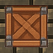

box


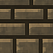

wall


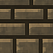

wall


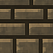

wall


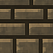

wall


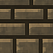

wall


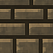

wall


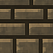

wall


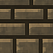

wall


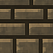

wall


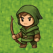

human


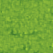

floor


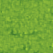

floor


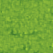

floor


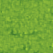

floor


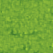

floor


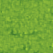

floor


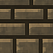

wall


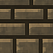

wall


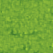

floor


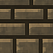

wall


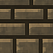

wall


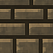

wall


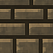

wall


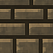

wall


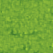

floor


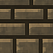

wall


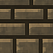

wall


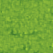

floor


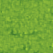

floor


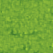

floor


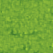

floor


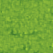

floor


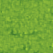

floor


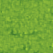

floor


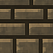

wall


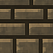

wall


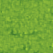

floor


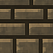

wall


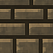

wall


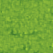

floor


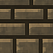

wall


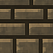

wall


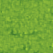

floor


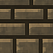

wall


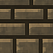

wall


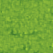

floor


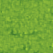

floor


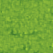

floor


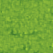

floor


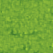

floor


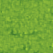

floor


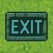

opened


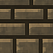

wall


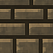

wall


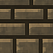

wall


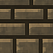

wall


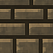

wall


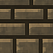

wall


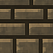

wall


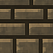

wall


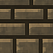

wall


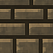

wall


In [114]:
"""L1: Basic maze turns (Exit).

Args:
    seed (int): Deterministic seed stored on resulting ``State``.

Returns:
    State: Authored immutable state.
"""
def _floors(level: Level, cost: int = 3) -> None:
    """Fill the grid with floor tiles carrying uniform Cost=cost per step."""
    for y in range(level.height):
        for x in range(level.width):
            level.add((x, y), create_floor(cost_amount=cost))


def _border(level: Level) -> None:
    """Draw wall border (background walls)."""
    for x in range(level.width):
        level.add((x, 0), create_wall())
        level.add((x, level.height - 1), create_wall())
    for y in range(level.height):
        level.add((0, y), create_wall())
        level.add((level.width - 1, y), create_wall())

w, h = 9, 7
lvl = Level(
    w,
    h,
    move_fn=default_move_fn,
    objective_fn=exit_objective_fn,
    seed=100,
    turn_limit=50,
)
_floors(lvl)
_border(lvl)
for x in range(2, w - 2):
    lvl.add((x, 2), create_wall())
for x in range(2, w - 2):
    if x != w // 2:
        lvl.add((x, h - 3), create_wall())
agent = create_agent(5)
lvl.add((1, 1), agent)
lvl.add((w - 2, h - 2), create_exit())
lvl.add((0, 0), create_box())
state = to_state(lvl)

image = (renderer_large.render(state))

import numpy as np

model = ImageClassify()
image: Image.Image = renderer_large.render(state)

tile_size = 53
for y in range(0, h * tile_size, tile_size):
    for x in range(0, w * tile_size, tile_size):
        cropped = image.crop((x, y, x + tile_size, y + tile_size)).convert("RGBA")
        display(cropped)
        print(model.predict(cropped))




## Tasks

### Task 1 – Structured + Plaintext Objective

Focus: Core environment understanding & planning.

Observation: Fully structured (no raw image). Objective text is plaintext.


In [6]:
env = create_env(build_level_required_two, observation_type="level")
state, _ = env.reset()
pprint(state, depth=1)
pprint(state.grid[1][1])  # list of entities at (1,1)
print("Objective function string:", state.objective_fn.__name__)  # objective function

Level(width=11,
      height=9,
      move_fn=<function default_move_fn at 0x7f72ace7ccc0>,
      objective_fn=<function default_objective_fn at 0x7f72ace7fce0>,
      seed=42,
      grid=[...],
      turn=0,
      score=0,
      win=False,
      lose=False,
      message=None,
      turn_limit=50)
[EntitySpec(agent=None,
            appearance=Appearance(name=<AppearanceName.FLOOR: 'floor'>,
                                  priority=10,
                                  icon=False,
                                  background=True),
            blocking=None,
            collectible=None,
            collidable=None,
            cost=Cost(amount=3),
            damage=None,
            exit=None,
            health=None,
            inventory=None,
            key=None,
            lethal_damage=None,
            locked=None,
            moving=None,
            pathfinding=None,
            portal=None,
            pushable=None,
            required=None,
            rewardable=Non

In [32]:
for result in evaluate_all_gameplay_levels(Agent, observation_type="level"):
    print(get_result_string(result))

level_name: Level maze turns (level), performance: 1.0, total_reward: -27.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 0.14
level_name: Level optional coin (level), performance: 1.0, total_reward: -21.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 6.89
level_name: Level required one (level), performance: 1.0, total_reward: -24.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 0.27
level_name: Level required two (level), performance: 1.0, total_reward: -63.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 0.56
level_name: Level key door (level), performance: 1.0, total_reward: -33.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 1.28
level_name: Level hazard detour (level), performance: 1.0, total_reward: -21.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 0.4
level_name: Level portal shortcut (level), performance: 0.9347826086956522, total_rewar

KeyboardInterrupt: 

### Task 2 – Structured + Ciphertext Objective
Focus: Objective decoding + integration with planner.

Differences from Task 1:
- The objective function is replaced with a dummy (redacted) function. The ciphertext objective string is given in `state.message`.
- Environment representation remains structured.

In this notebook, we use the ciphertext objective data in the path specified by the `CIPHERTEXT_PATH` variable which is set to `data/ciphertext_objective.csv`. You can change this to use different file.

> In the Coursemology private test cases, we will be using different ciphertext objective data which is sampled from the same ground truth. Your decoder must generalize well.

In [33]:
env = create_cipher_env(
    build_level_required_two,
    observation_type="level",
    cipher_text_pairs=CIPHER_TEXT_PAIRS,
    seed=42,
)
state, _ = env.reset()
pprint(state, depth=1)
pprint(state.grid[1][1])  # list of entities at (1,1)
print("Ciphertext objective string:", state.message)  # ciphered objective string
print(
    "Plaintext objective string:", env.state.objective_fn.__name__
)  # plaintext objective string (your agent can't access this because it's not part of the state!)

print(state.objective_fn.__name__)

Level(width=11,
      height=9,
      move_fn=<function default_move_fn at 0x7f76184e4180>,
      objective_fn=<function redact_objective_fn.<locals>.<lambda> at 0x7f74cb8bc180>,
      seed=42,
      grid=[...],
      turn=0,
      score=0,
      win=False,
      lose=False,
      message='dS\\jYPd?t1k:L-~d1<2M264/\\FnZ83!N:onosQ8qD.Q4Q7ZdX>At"KfBh&q=tUOK*t%:>uFFT|GOUbhteQhZ\\L\'7A<NZhK@._c|V',
      turn_limit=50)
[EntitySpec(agent=None,
            appearance=Appearance(name=<AppearanceName.FLOOR: 'floor'>,
                                  priority=10,
                                  icon=False,
                                  background=True),
            blocking=None,
            collectible=None,
            collidable=None,
            cost=Cost(amount=3),
            damage=None,
            exit=None,
            health=None,
            inventory=None,
            key=None,
            lethal_damage=None,
            locked=None,
            moving=None,
            path

You can specify a different seed to change the objective and its associated ciphertext of a level.

In [34]:
env = create_cipher_env(
    build_level_required_two,
    observation_type="level",
    cipher_text_pairs=CIPHER_TEXT_PAIRS,
    seed=2,
)
state, _ = env.reset()
print("Ciphertext objective string:", state.message)  # ciphered objective string
print(
    "Plaintext objective string:", env.state.objective_fn.__name__
)  # plaintext objective string (your agent can't access this because it's not part of the state!)

Ciphertext objective string: }dQZU(Ddua:1B[I*p(+':@ALW`Nt{Do=oDN.)B6>uJqs4Tcv"Bg_v-W7nKk(iJr-Q/I^(.'Mxa<n~bUV1N,O~j6zPtdzb?Tw6Q.V
Plaintext objective string: exit_objective_fn


In [38]:
result = evaluate_level(
    Agent,
    build_level_required_two,
    observation_type="level",
    max_total_reward=-63,
    min_total_reward=LEVEL_MIN_REWARD[build_level_required_two.__name__],
    cipher_text_pairs=CIPHER_TEXT_PAIRS,
    turn_limit=LEVEL_TURN_LIMIT,
    time_limit=TIME_LIMIT,
    seed=1,
)
print(get_result_string(result))
result = evaluate_level(
    Agent,
    build_level_required_two,
    observation_type="level",
    max_total_reward=-21,
    min_total_reward=LEVEL_MIN_REWARD[build_level_required_two.__name__],
    cipher_text_pairs=CIPHER_TEXT_PAIRS,
    turn_limit=LEVEL_TURN_LIMIT,
    time_limit=TIME_LIMIT,
    seed=2,
)
print(get_result_string(result))

level_name: Level required two (level,cipher default_objective_fn), performance: 1.0, total_reward: -63.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 0.6
level_name: Level required two (level,cipher exit_objective_fn), performance: 1.0, total_reward: -21.0, win: True, lose: False, timeout: False, error: False, runtime (sec): 0.33


### Task 3 – Image + Structured Supplemental Data
Focus: Perception + integration with planner.

Observation:

- Primary: Image (rendered grid) requiring visual parsing.
- Supplemental: Limited structured fields (e.g., agent health, inventory, status).
- Objective: plaintext.

Challenges:

1. Visual Parsing: Convert image to structured state representation such as `Level` object.
2. Planning: Works on reconstructed grid, tolerates occasional misclassification.
3. Performance: Keep per‑frame processing small if possible.

Recommended Steps:

1. Integrate Task 1 planner.
2. Prototype image → structured state on a single level; generalize.
3. Optimize & prune unused code/weights.

In this notebook, we use the assets in the path specified by the `ASSET_PATH` variable which is set to `data/assets`. You can change this to use different assets.

> In the Coursemology private test cases, we will be using different asset image data which is sampled from the same ground truth. Your parser must generalize well.

You can specify a different seed to change the appearance of a level.

Loaded image: data/assets/imagen1/gem/gem_1.png size: (128, 128) mode: RGBA


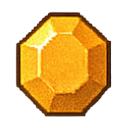

In [17]:
import os
from PIL import Image
from IPython.display import display

asset_subpath = os.path.join(ASSET_ROOT, "imagen1", "gem")
img_path = None

# If it's a directory, pick the first common image file
if os.path.isdir(asset_subpath):
    for fname in sorted(os.listdir(asset_subpath)):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp')):
            img_path = os.path.join(asset_subpath, fname)
            break
# If it's a file or a file without extension, try directly or with common extensions
elif os.path.isfile(asset_subpath):
    img_path = asset_subpath
else:
    for ext in ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.webp'):
        candidate = asset_subpath + ext
        if os.path.isfile(candidate):
            img_path = candidate
            break

if img_path is None:
    raise FileNotFoundError(f"No image found at: {asset_subpath}")

img = Image.open(img_path).convert("RGBA")
print("Loaded image:", img_path, "size:", img.size, "mode:", img.mode)
display(img)

# If a torchvision transform named `transform` exists, produce a tensor as well
try:
    image_tensor = transform(img)
    print("Image tensor shape:", image_tensor.shape)
except NameError:
    pass

(638, 522)
torch.Size([4, 522, 638])
{'image': array([[[ 90,  71,  51, 255],
        [ 91,  69,  49, 255],
        [ 93,  71,  52, 255],
        ...,
        [ 91,  70,  50, 255],
        [ 90,  68,  50, 255],
        [ 87,  68,  49, 255]],

       [[100,  79,  58, 255],
        [107,  88,  68, 255],
        [105,  82,  63, 255],
        ...,
        [101,  81,  62, 255],
        [103,  82,  61, 255],
        [101,  82,  63, 255]],

       [[100,  79,  59, 255],
        [103,  82,  64, 255],
        [105,  82,  61, 255],
        ...,
        [101,  77,  59, 255],
        [100,  78,  59, 255],
        [100,  79,  60, 255]],

       ...,

       [[ 94,  73,  55, 255],
        [ 94,  74,  56, 255],
        [ 96,  73,  54, 255],
        ...,
        [ 79,  62,  47, 255],
        [ 74,  57,  44, 255],
        [ 71,  57,  45, 255]],

       [[ 94,  73,  56, 255],
        [ 96,  74,  58, 255],
        [ 97,  75,  57, 255],
        ...,
        [ 85,  67,  53, 255],
        [ 86,  68,  53, 255

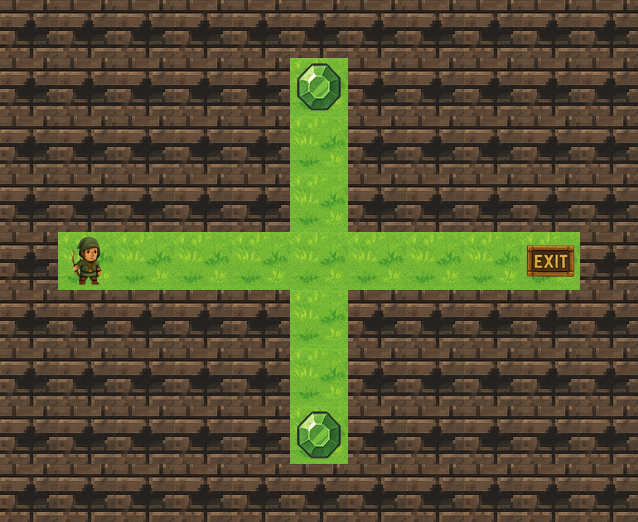

In [28]:
from torchvision import transforms

env = create_env(build_level_required_two, observation_type="image", seed=43)
state, _ = env.reset()

image = Image.fromarray(state["image"])
print(image.size)
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image)
print(image_tensor.shape)
pprint(state)
# print(image_tensor.shape)

display(image)

In [ ]:
# Specify a different seed to test the agent on a different looking level
for result in evaluate_all_gameplay_levels(
    Agent,
    observation_type="image",
    seed=list(range(1, len(GAMEPLAY_LEVEL_BUILDERS) + 1)),
):
    print(get_result_string(result))

level_name: Level maze turns (image), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 1.86
level_name: Level optional coin (image), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 2.04
level_name: Level required one (image), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 2.18
level_name: Level required two (image), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 3.82
level_name: Level key door (image), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 2.38
level_name: Level hazard detour (image), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 2.23
level_name: Level portal shortcut (image), performance: 0.0, total_reward: -150.

### Task 4 – Capstone

In this task, we combine multiple gameplay mechanics in one level. This is the final frontier of the mini project!

We will consider both `Level` and `Observation` observations and ciphertext objective.

Note: your agent needs to detect plaintext vs ciphertext objective. In `Observation` observation, ciphertext objective is given in `state["info"]["message"]` if the plaintext objective function in `state["info"]["config"]["objective_fn"]` is `<REDACTED>`.

In [ ]:
env = create_cipher_env(
    build_level_capstone, observation_type="image", cipher_text_pairs=CIPHER_TEXT_PAIRS
)
state, _ = env.reset()

image = Image.fromarray(state["image"])
print(
    "Objective function string:", state["info"]["config"]["objective_fn"]
)  # objective function (if not redacted)
print(
    "Ciphertext objective string:", state["info"]["message"]
)  # ciphertext objective string

# You can see the underlying state of the env via env.state, but your agent won't have access to this!
print("\n--- Underlying env.state ---")
print(
    "Plaintext objective string:", env.state.objective_fn.__name__
)  # plaintext objective string
print("The underlying `Level` object is:")
pprint(from_state(env.state), depth=1)

Objective function string: <REDACTED>
Ciphertext objective string: dS\jYPd?t1k:L-~d1<2M264/\FnZ83!N:onosQ8qD.Q4Q7ZdX>At"KfBh&q=tUOK*t%:>uFFT|GOUbhteQhZ\L'7A<NZhK@._c|V

--- Underlying env.state ---
Plaintext objective string: exit_objective_fn
The underlying `Level` object is:
Level(width=7,
      height=7,
      move_fn=<function default_move_fn at 0x7f72ace7ccc0>,
      objective_fn=<function exit_objective_fn at 0x7f72ace7fd80>,
      seed=42,
      grid=[...],
      turn=0,
      score=0,
      win=False,
      lose=False,
      message='dS\\jYPd?t1k:L-~d1<2M264/\\FnZ83!N:onosQ8qD.Q4Q7ZdX>At"KfBh&q=tUOK*t%:>uFFT|GOUbhteQhZ\\L\'7A<NZhK@._c|V',
      turn_limit=50)


In [ ]:
result = evaluate_level(
    Agent,
    build_level_capstone,
    observation_type="level",
    max_total_reward=-84,
    min_total_reward=LEVEL_MIN_REWARD[build_level_capstone.__name__],
    cipher_text_pairs=CIPHER_TEXT_PAIRS,
    turn_limit=LEVEL_TURN_LIMIT,
    time_limit=CAPSTONE_TIME_LIMIT,
    seed=1,
)
print(get_result_string(result))
result = evaluate_level(
    Agent,
    build_level_capstone,
    observation_type="image",
    max_total_reward=-63,
    min_total_reward=LEVEL_MIN_REWARD[build_level_capstone.__name__],
    cipher_text_pairs=CIPHER_TEXT_PAIRS,
    turn_limit=LEVEL_TURN_LIMIT,
    time_limit=CAPSTONE_TIME_LIMIT,
    seed=2,
)
print(get_result_string(result))

level_name: Level capstone (level,cipher default_objective_fn), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 0.09
level_name: Level capstone (image,cipher exit_objective_fn), performance: 0.0, total_reward: -150.0, win: False, lose: True, timeout: False, error: False, runtime (sec): 1.95


## Debugging Your Agent Behavior

To assist in debugging your agent, we’ve created a utility function called `show_images_interactive`. This function enables you to interactively observe the behavior of your agent during evaluation in an environment.

MatplotlibImageBrowser(fig=<Figure size 600x500 with 4 Axes>, ax_img=<Axes: title={'center': 'Score: 0, Health: 5, Action: UP'}>, slider=<matplotlib.widgets.Slider object at 0xffff50da7230>, btn_prev=<matplotlib.widgets.Button object at 0xffff50da7620>, btn_next=<matplotlib.widgets.Button object at 0xffff50c68cd0>)

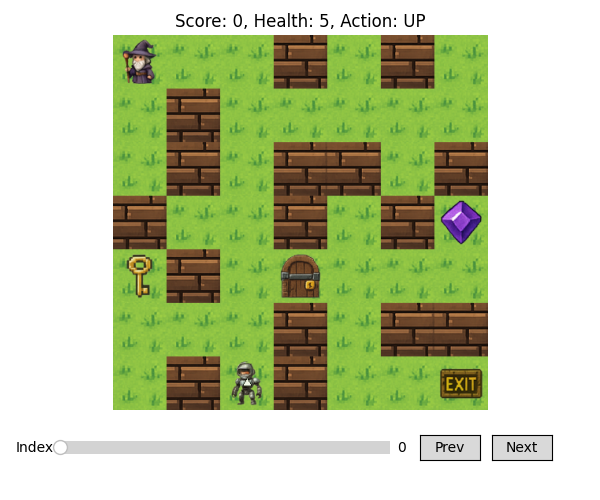

In [ ]:
%matplotlib widget

from grid_universe.renderer.texture import TextureRenderer
from utils import show_images_interactive

renderer = TextureRenderer(resolution=480)

# Specify a different seed to test the agent on a different looking level
env = create_env(build_level_capstone, observation_type="image", seed=42)
total_reward, win, lose, history = evaluate(Agent, env)
agent_id = next(iter(history[0][0].agent.keys()))
show_images_interactive(
    [renderer.render(s) for s, a in history],
    titles=[
        f"Score: {s.score}, Health: {s.health[agent_id].health}, Action: {a.name}"
        for s, a in history
    ],
)

## Resources and Hints

### Machine Learning

In this mini project, you'll likely need to use machine learning technique. The following resources may be helpful.

- **Scikit-learn**:

  - https://scikit-learn.org/1.4/tutorial/basic/tutorial.html
  - https://youtu.be/0B5eIE_1vpU?si=RIu4tBcpyHiySC2D

- **PyTorch**: This will be introduced in a future problem set. Here are some videos and Colab notebook to get you started:

  - https://colab.research.google.com/drive/12nQiv6aZHXNuCfAAuTjJenDWKQbIt2Mz
  - https://youtu.be/ubSsUJbLkwM?si=SPXEkZYV7CS2ZffZ
  - https://youtu.be/dsNtkT7LF8M?si=UY00ChyxNU1UNJxj

### External Computational Resources
It is useful to have access to some computing resources to run your code and train machine learning models. Two options are Google Colaboratory and the School of Computing Compute Cluster.

#### [Google Collaboratory](https://colab.research.google.com/)

Google Collaboratory, or "Colab" for short, is a free cloud-based platform provided by Google that allows you to write and run Python code using a Jupyter notebook interface. Colab provides access to a virtual machine with a GPU and sometimes even a TPU, which can speed up computation for tasks like training machine learning models. You can use Colab on your own computer without installing any software, and it provides access to a number of libraries and datasets. However, there may be limits on how much time, memory, and storage space you can use, and you may need to reauthorize your session frequently.

You may find the following video useful: https://www.youtube.com/watch?v=hZgykFahXrs .

#### [The School of Computing Compute Cluster](https://dochub.comp.nus.edu.sg/cf/guides/compute-cluster/start)
The School of Computing Compute Cluster is a set of high-performance computing resources that are available to students, faculty, and researchers affiliated with the National University of Singapore's School of Computing. The cluster consists of multiple nodes, each with its own set of CPUs, memory, and storage. You can submit jobs to the cluster using the Slurm workload manager, which allocates resources to jobs based on availability and user-specified requirements. The Compute Cluster provides significantly more computing power than Colab, with the ability to scale up to hundreds or even thousands of cores. However, you need to apply for access to the cluster, and there may be limits on the amount of resources that can be used at any given time. Additionally, using the cluster requires some technical expertise and familiarity with the Linux command line interface. Log in with your NUS account and follow the guides here: https://dochub.comp.nus.edu.sg/cf/guides/compute-cluster/start

**Quick links**:

- Accessing the Cluster: https://dochub.comp.nus.edu.sg/cf/guides/compute-cluster/access
- Slurm Cluster Information: https://dochub.comp.nus.edu.sg/cf/guides/compute-cluster/start#slurm-cluster-information
- Compute Cluster Hardware Configuration: https://dochub.comp.nus.edu.sg/cf/guides/compute-cluster/start#compute-cluster-hardware-configuration
- Slurm Quick Start Guide: https://dochub.comp.nus.edu.sg/cf/guides/compute-cluster/start#slurm-quick-start-guide
If you prefer not to use Google Colaboratory or the School of Computing Compute Cluster, you can also run your code on your own computer. However, keep in mind that your computer may not have as much processing power or memory as the other options, so your code may run more slowly and you will take more time to complete the task.

### Hardcoding Your Trained ML Model
Because Coursemology disallows arbitrary auxiliary file uploads (e.g. separate `.pth` / `.pkl` weight files), any ML models your `Agent` depends on must ship **inline inside your submission**. To make this easy (and less error‑prone than manually copying numbers), we provide two helper functions in `utils.py`:

- `generate_torch_loader_snippet(model, example_inputs=..., prefer='auto', compression='zlib')`
- `generate_sklearn_loader_snippet(model, compression='zlib')`

Each returns a fully self‑contained Python source string defining a `get_model(...)` function. You copy‑paste that function into your agent code. At runtime the function reconstructs the trained model from a Base64‑encoded (optionally compressed) blob embedded directly in the source.

Why this approach?
- No manual transcription errors (forgetting bias terms, transposing weights, etc.).
- Supports arbitrary model shapes / pipelines.
- Optional compression keeps your submission small (<2 MB limit).
- PyTorch path prioritizes TorchScript for safety and portability, then falls back gracefully.

Below we show the end‑to‑end workflow for PyTorch and scikit‑learn. We also keep (optional) manual hardcoding examples for pedagogy.

Suppose you train a model on the following data:

In [ ]:
import numpy as np

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([1, 8, 2, 4])

#### PyTorch

Assume you have the following simple network (we'll train it briefly, then auto‑generate a loader snippet):

In [ ]:
import torch
from torch import nn

net = nn.Linear(2, 1)

Train the network:

In [ ]:
def train(net: nn.Module, X: np.ndarray, y: np.ndarray):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y[:, None], dtype=torch.float32)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    for epoch in range(100):
        optimizer.zero_grad()
        output = net(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()


train(net, X, y)

Option 1 (Recommended): Automatically generate a self‑contained loader snippet.

Run the following after training:

In [18]:
# Auto‑generate a loader snippet for the trained PyTorch model
from utils import generate_torch_loader_snippet

example_input = torch.tensor(
    [[0.0, 0.0]], dtype=torch.float32
)  # minimal example for tracing if needed
snippet = generate_torch_loader_snippet(
    net, example_inputs=example_input, prefer="auto", compression="zlib"
)
print(snippet)

# You would copy the FULL printed function definition (def get_model(...): ...) into your agent source code.
# Then inside Agent.__init__ you could do: self.model = get_model()

def get_model(device: str = "cpu", dtype: str | None = None):
    """
    Return a TorchScript model loaded from an embedded, base64-encoded compressed blob.
    Self-contained: no need for the original Python class.

    Args:
        device: Where to map the model (e.g., "cpu", "cuda", "cuda:0").
        dtype: Optional dtype to convert parameters/buffers to (e.g., "float32", "float16").
    """
    import base64, io, torch
    import zlib as _z; _decomp = _z.decompress
    _blob_b64 = "eNoL8GZmYWDg4GDAAHwMIgyJRckZmWWp+imJJYn6Bm5OAgxRaGCnoZw9i4y7fYA3OwfzSSVtkEEgHIDHXBtUcw3dnCwwzCUWOPYagu2WcLKaDbSQgQWv3QIMdih26xVk57g5WZFte1RUA1NyfHxJPtDM+Hg9MK2Xl6eXm59SmpNarJeTmZeaWMTlA6EKGTQbazUi2IAOKU/NTM8oKWRMhmiJLy3JzCnmii9KTSrNzEmJL0nNK84vii8z4ipk0tCIYAfqKAaqTExPLWSGaOFyy8lPLAmGCHIVskQwAtUYFLJGMAPp5ILSQjZvppLAQnZvBg1vRiBTw5vJm7GkIzk5PycnNbkkMz+vmMu/KCW1KDXFJTO5hKuQQzOoJKiQMwIUgEmZicWFXBlAqzOYMyBGGxZyZ7ABTQgs5AEbWQLCHRkQXbwRoLAuKUrMzMvMSy/k64wQA/LjM4vj00pzcuKTEpOzyxOLUuIz8vOzC/n9SpMKBfRAkdZaO73XEm

Option 2 (Manual, Educational): Manually copy weights into a freshly constructed model. This is more error‑prone and not recommended for larger networks, but shown for completeness.


In [ ]:
# Set precision of printing numbers to 10 d.p.
torch.set_printoptions(precision=10)
print(net.state_dict())

OrderedDict({'weight': tensor([[0.6179462075, 0.7777712345]]), 'bias': tensor([0.6935616136])})


Example output:
```python
OrderedDict([('weight', tensor([[0.1491376609, 1.3386186361]])), ('bias', tensor([0.6359716654]))])
```

Notes:
- `OrderedDict` is from the `collections` module; `tensor` is a PyTorch tensor constructor.
- Ensure you exactly match shapes and dtypes.

To hardcode manually:

In [ ]:
from collections import OrderedDict
from torch import tensor

# declare the same model
model = nn.Linear(2, 1)

# Hardcode the weights from the previous step (input your values here)
coeffs = OrderedDict(
    [
        ("weight", tensor([[0.1491376609, 1.3386186361]])),
        ("bias", tensor([0.6359716654])),
    ]
)

# Load the model with the hardcoded weights
model.load_state_dict(coeffs)

# The model now has the same weights as it was previously trained
X_tensor = torch.tensor(X, dtype=torch.float32)

# Check if the outputs are the same
torch.allclose(model(X_tensor), net(X_tensor))

False

#### Scikit-Learn

We'll repeat the process for scikit‑learn: train a model, then auto‑generate the loader snippet. Manual coefficient hardcoding is also shown afterward for transparency.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.782608695652174

Option 1 (Recommended): Automatically generate a loader snippet for the trained sklearn model.

In [ ]:
# Auto‑generate a loader snippet for the trained sklearn model
from utils import generate_sklearn_loader_snippet

sk_snippet = generate_sklearn_loader_snippet(reg, compression="zlib")
print(sk_snippet)

def get_model():
    """
    Reconstruct and return a scikit-learn model from an embedded, base64-encoded compressed blob.

    Security note:
      This uses pickle-compatible loading. Only use if you trust the source.
    """
    import base64
    import pickle as _p
    import zlib as _z; _decomp = _z.decompress
    _blob_b64 = "eNpNkb9Lw0AUx/uDlKpYilJR/4K6RJ3qILbQQTASoZPbkaSX5mxyFy6XSgdBB7WFc/Kpg4ujo0t3p/4jnRzERRAnvSaivuHe43j3ed/vu1PtZpTNJCFXo66PLU51n1CVUcDa2NeRbUUYZHk/uWzhDsdRRBiFa1g7gxOoynmXCESowNzBoYCBLDgs7KNDVeUF82F352n88TB6vZIFio6YHYEpiyGLiCA9DENZosjFlogVWGEQGDmpOQy7COQijYOwryOHcayrGnPigJxDLmeBHbsu5kpG9bacOsikTpaf07zQAKklAJXboh9i1Sxz7hYMB5fQgqqRl9ltME1z70tFchgZAbaROweZbYJQTVLjFu0momYiQjuxrzYDXulv6OP73f3x5LN+8LJeextP6uBVpgBvJXk++7sYZWfpv50g9gWxOLeUvELkWAqs9HmVZjHllhpwMSWU0c+/oB7myealtqnX9A2Ibf0bEO6rQg=="
    _raw = _decomp(base64.b64decode(_blob_b64))
    model = _p.loads(_raw)
    return model



Option 2 (Manual) instead of using the generated snippet, copy the printed coefficients/intercept:

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[-6.   4.5]
3.75


Example (your numbers will differ):
```python
[-6.   4.5]
3.75
```
Then hardcode them:

In [ ]:
model = LinearRegression()
model.coef_ = np.array([-6, 4.5])
model.intercept_ = 3.75

assert np.allclose(model.predict(X), reg.predict(X))